# <span style="color:Green">Using machine learning to understand Covid-19 deaths in USA from behaviour indicators (data collected by UMD and CMU)</span>. 

This jupyter notebook has been created to explore various supervised and unsupervised learning algorithms to aid the exploration of Covid-19 indicators dataset. The dataset is provided by the Delphi Group at Carnegie Mellon University (CMU) and the University of Maryland (UMD), and was collected via a facbook survey between the dates of April 6th 2020 and 4th Jan 2021. The data is collected from USA participants and is split off by State and FIPS. <br>
The indicators looked at in this task focus on behaviour indiciators such as whether the participant has been travelling to another state or wearing a mask. The target variable which is deaths in this case will be merged onto the orginal facebook survey dataset and originates from data collected by John Hopkins Univeristy regarding Covid cases and deaths. <br>
This notebook will look into preprocessing techniques such as data transformations, data integration and data reduction. Then a few supervised learning algorithms (both regression and classification methods) as well unsupervised algrothims will be used to find the best model in both types of regression and classification machine learning algorithms. <br>

The tasks are in brown colour with second heading size, the smaller subtitles are in purple. Comments are in blue. The tasks are done in order with: <br>
- task A being the preprocessing methods
<br>
- task B looks at unsupervised learning algorithms 
<br> 
- task C looks at supervised learning methods. <br>

Various datasets are introduced in task A for merging pruposes and due to great numbers of missing data. <br>

Python packages were chosen based upon their usefuleness to the problem and ease of using them. <br>

In this task it was found that random forest algorithm was the best to use as a supervised learning model both as a classification and regression problem. This is based of their scores in accuracy and root mean square error respectively. 

## <span style="color:brown"> Task A

In [359]:
#import pandas
import pandas as pd 

In [360]:
#read the USA dataset from CMU and UMD symptom dataset
df=pd.read_csv('overall-state-smoothed.csv')

<span style="color:blue">
  USA data was specifically chosen due to less missing data compared to the global data for interested question  
 The research question was changed multiple times to try and encorporate all datasets. The target variable (deaths and covid cases) were only categorised by state or FIPS
</span>.

In [361]:
#get a look at dataframe
df.head(10)

,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,04/01/2021,ak,female,18-34,142,2.817,2.817,4.225,1.409,27.131,...,0.000,2.701,0.839,4.327,22.509,0.634,1.966,7.187,62.527,12.341
1,03/01/2021,ak,female,18-34,130,3.077,3.077,4.615,1.538,28.317,...,0.000,3.683,0.000,2.214,20.025,0.693,2.148,7.522,68.870,12.235
2,02/01/2021,ak,female,18-34,116,3.448,3.448,4.310,2.586,30.315,...,0.000,1.476,0.000,2.537,19.545,0.000,2.407,7.097,72.144,9.652
3,01/01/2021,ak,female,18-34,119,3.361,3.361,4.202,2.521,31.541,...,0.000,2.275,0.930,3.308,25.242,0.000,2.487,7.926,65.424,12.790
4,31/12/2020,ak,female,18-34,113,1.770,1.770,1.770,0.885,27.274,...,0.000,1.722,0.980,5.284,25.120,0.000,0.880,6.554,64.530,12.901
5,30/12/2020,ak,female,18-34,114,1.754,1.754,2.632,0.877,27.692,...,0.000,1.707,0.971,5.822,23.524,0.000,0.872,5.657,65.573,11.834
6,29/12/2020,ak,female,18-34,118,2.542,2.542,3.390,0.848,28.713,...,0.000,1.649,0.938,8.347,25.163,0.000,0.843,6.094,62.907,16.092
7,28/12/2020,ak,female,18-34,119,1.681,1.681,3.408,0.840,27.632,...,0.000,1.635,0.930,11.060,27.593,0.000,0.836,5.271,56.330,16.532
8,27/12/2020,ak,female,18-34,125,1.600,1.600,3.244,0.800,26.494,...,0.000,0.795,0.886,12.196,31.962,0.000,0.795,4.894,52.709,18.298
9,26/12/2020,ak,female,18-34,122,0.820,0.820,2.505,0.000,23.694,...,0.000,0.815,0.907,12.227,31.843,0.000,0.815,2.817,54.455,16.102


In [362]:
#let's look at some brief information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Columns: 105 entries, date to smoothed_pct_multiple_medical_conditions_weighted
dtypes: float64(100), int64(1), object(4)
memory usage: 130.3+ MB


In [363]:
#get a look at some basic statistical information about dataset 
df.describe()

,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_worried_finances,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,smoothed_pct_hh_cough,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
count,162691.000,162684.000,162684.000,162684.000,162691.000,157147.000,67685.000,162691.000,162691.000,162691.000,...,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000
mean,2195.422,0.785,0.814,2.096,1.227,18.914,44.452,1.574,7.177,14.282,...,6.434,4.858,5.903,29.170,15.233,4.211,2.295,6.470,49.367,22.106
std,3235.770,0.630,0.653,1.389,0.852,9.908,9.269,0.960,3.259,4.441,...,7.556,3.837,5.196,15.328,4.022,3.513,1.675,3.271,14.657,12.417
min,50.000,0.000,0.000,0.000,0.000,0.000,14.894,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.647,0.000,0.000,0.000,9.308,0.000
25%,473.000,0.372,0.387,1.180,0.664,11.354,37.590,0.929,4.762,11.023,...,0.000,1.361,1.640,16.983,12.333,1.055,0.951,3.757,37.952,12.220
50%,1126.000,0.639,0.662,1.737,1.024,16.768,44.643,1.366,6.635,13.612,...,2.492,4.188,4.350,28.792,15.288,3.555,1.991,6.148,49.834,20.984
75%,2530.000,1.043,1.080,2.634,1.585,24.437,51.181,2.010,9.023,16.887,...,11.721,7.226,8.808,40.432,17.992,6.490,3.228,8.928,60.262,31.260
max,45877.000,8.065,8.065,17.895,11.667,69.117,75.151,11.667,31.169,41.071,...,34.933,27.722,27.693,70.687,40.526,20.871,15.635,30.139,87.876,58.631


 <font color = blue>  There's so many columns, we will refine to columns that serve our interest. 

In [364]:
#let' reduce the dataframe to our interested columns which are the behaviour indicators such as wearing masks

df=df.iloc[:, [0,1,2, 3, 88,89, 90, 91,92,93, 94,38,39,40,44 ]]
df

,date,state_code,gender,age_bucket,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
0,04/01/2021,ak,female,18-34,0.000,0.000,51.901,8.055,6.225,1.817,4.165,NaN,NaN,52.113,3.521
1,03/01/2021,ak,female,18-34,0.000,0.000,53.256,7.996,6.310,1.891,4.549,NaN,NaN,53.846,3.846
2,02/01/2021,ak,female,18-34,0.000,0.000,51.172,9.005,9.720,1.578,4.595,NaN,NaN,53.448,4.310
3,01/01/2021,ak,female,18-34,0.000,0.000,58.430,8.238,11.081,1.974,5.062,NaN,NaN,59.664,5.042
4,31/12/2020,ak,female,18-34,0.000,0.000,62.510,3.870,10.340,1.602,2.068,NaN,NaN,64.602,2.655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162686,16/04/2020,wy,overall,overall,38.351,46.006,70.512,4.897,3.866,0.701,1.383,88.540,45.558,72.744,1.177
162687,15/04/2020,wy,overall,overall,39.898,46.767,70.389,4.904,3.437,0.630,1.389,89.159,45.536,71.964,1.254
162688,14/04/2020,wy,overall,overall,40.072,47.310,70.850,4.930,6.665,0.583,1.233,89.114,45.645,72.915,1.054
162689,13/04/2020,wy,overall,overall,40.824,46.185,72.694,4.990,5.989,0.426,1.158,88.191,44.752,74.331,0.973


In [365]:
# now that we have less columns lets explore dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   date                                                               162691 non-null  object 
 1   state_code                                                         162691 non-null  object 
 2   gender                                                             162691 non-null  object 
 3   age_bucket                                                         162691 non-null  object 
 4   smoothed_pct_did_not_try_to_get_tested_weighted                    162691 non-null  float64
 5   smoothed_pct_worked_outside_home_weighted                          162691 non-null  float64
 6   smoothed_pct_avoid_contact_all_or_most_time_weighted               162691 non-null  float64
 7   smoothed_me

<span style="color:blue">
   What we see is that non-weigthed columns have a lot of null values. Upon inspection we realise that the weighted data simply converts null values to 0. This was realised quite far into the coursework, as some of them have are missing upto 95% data, the columns were simply dropped and new data (that were still behaviour indicators) from the same data source was imported. It also important to note that the research question was changed several times to make better use of both datasets and to avoid extreme numbers of missing data.  </span>.

In [366]:
df.describe()

,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
count,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000,162691.000,91404.000,91958.000,112571.000,162691.000
mean,16.300,28.115,39.071,68856187496542511519086292879013384595326852815...,80576061367869150355830702438505080169931520527...,25891413784413396292722285399068850767939477442...,3.122,81.439,47.719,55.718,2.936
std,14.834,26.359,27.320,61635785952638034078471776678043835949491065155...,71847799501328581346730035895854301097526471695...,inf,2.208,7.542,13.760,14.552,2.088
min,0.000,0.000,0.000,-10726800000000000.000,-107268000000000.000,-107268000000000000.000,0.000,41.761,5.882,7.042,0.000
25%,0.000,0.000,0.000,5.917,4.881,1.776,1.528,75.947,37.575,44.661,1.442
50%,20.915,30.565,45.474,11.168,8.664,4.085,2.536,82.415,47.594,54.983,2.353
75%,28.873,51.738,60.126,21.966,22.437,12.616,4.197,87.698,57.544,66.204,3.915
max,54.193,96.046,96.449,98999999999999991855656793112505693906208795051...,94700000000000001264149977940260846323486545083...,28900000000000002967563072347840654526745770180...,21.406,100.000,94.444,95.082,20.151


<span style="color:blue"> Take a look at the smoothed_mean_outside_hh_contact_at_work_ct_weighted column statistics, this is another reason, most of the data from this dataset wasn't used. What is the reason these numbers are excessively high? 9.9 x10^68 is unexplainably high. The info that came with the dataset was also looked at but due to the missing and extreme values, most of these columns werent used except one. 
    </span>
    
    
  

In [367]:
#convert to data column datetime format so it can be used for groupby

df['date'] =  pd.to_datetime(df['date'], format='%d/%m/%Y')
df


,date,state_code,gender,age_bucket,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
0,2021-01-04,ak,female,18-34,0.000,0.000,51.901,8.055,6.225,1.817,4.165,NaN,NaN,52.113,3.521
1,2021-01-03,ak,female,18-34,0.000,0.000,53.256,7.996,6.310,1.891,4.549,NaN,NaN,53.846,3.846
2,2021-01-02,ak,female,18-34,0.000,0.000,51.172,9.005,9.720,1.578,4.595,NaN,NaN,53.448,4.310
3,2021-01-01,ak,female,18-34,0.000,0.000,58.430,8.238,11.081,1.974,5.062,NaN,NaN,59.664,5.042
4,2020-12-31,ak,female,18-34,0.000,0.000,62.510,3.870,10.340,1.602,2.068,NaN,NaN,64.602,2.655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162686,2020-04-16,wy,overall,overall,38.351,46.006,70.512,4.897,3.866,0.701,1.383,88.540,45.558,72.744,1.177
162687,2020-04-15,wy,overall,overall,39.898,46.767,70.389,4.904,3.437,0.630,1.389,89.159,45.536,71.964,1.254
162688,2020-04-14,wy,overall,overall,40.072,47.310,70.850,4.930,6.665,0.583,1.233,89.114,45.645,72.915,1.054
162689,2020-04-13,wy,overall,overall,40.824,46.185,72.694,4.990,5.989,0.426,1.158,88.191,44.752,74.331,0.973


In [368]:
#df=df.loc[df['age_bucket'] == 3]
#df=df.loc[df['gender'] == 2]
#df

<span style="color:blue"> The age, gender columns were encoded but then after realising the deaths and cases weren't categorsied by these features, they weren't useful. Maybe they could've been useful supervised learning (this is being realised very late unfortunately). They will be dropped later on in this notebook.
    </span>

In [369]:
# Groupby by state and find mean of each state per day for the interested columns. 

df = df.groupby(['state_code', pd.Grouper(key='date')]).mean().reset_index().sort_values('date')
df

,state_code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
0,ak,2020-04-12,36.796,38.398,80.001,31.262,8.478,0.228,0.663,89.633,37.367,81.458,0.564
534,ar,2020-04-12,40.797,44.541,72.105,9.187,17.333,0.627,0.880,91.339,44.314,73.370,0.888
9879,or,2020-04-12,41.299,35.906,81.507,16.145,447.615,0.392,0.975,90.406,34.924,82.555,0.890
13497,wy,2020-04-12,40.863,46.822,72.835,5.394,5.510,0.456,1.114,89.265,46.554,73.403,0.989
5073,ma,2020-04-12,38.216,30.873,85.257,8.984,2.557,0.297,1.506,90.620,30.307,86.197,1.554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,in,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,NaN,57.702,5.882
4004,il,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,NaN,65.486,4.308
10559,pr,2021-01-04,0.000,0.000,90.988,0.522,4.104,0.765,3.697,NaN,NaN,92.647,2.941
13762,wy,2021-01-04,0.000,0.000,47.876,7.606,9.715,4.567,5.289,NaN,NaN,49.918,5.258


<span style="color:blue"> Initially working with groupby by FIPS took extremely long to run and there were way too many rows, therefore groupby by state was chosen to look into. There are around 3 or 4 attempts at different questions as well as an attempt to groupby FIPS which are all available if requested. A powerful computer would have been more useful for FIPS analysis, the laptop used for this coursework was quite slow
    </span>

In [370]:
#  The state_code column is being chased to upper case for ease of merging 
#   becuase the other datasets have capital state code initials and it is
# more conventional 

df['state_code'] = df['state_code'].str.upper()
df

,state_code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
0,AK,2020-04-12,36.796,38.398,80.001,31.262,8.478,0.228,0.663,89.633,37.367,81.458,0.564
534,AR,2020-04-12,40.797,44.541,72.105,9.187,17.333,0.627,0.880,91.339,44.314,73.370,0.888
9879,OR,2020-04-12,41.299,35.906,81.507,16.145,447.615,0.392,0.975,90.406,34.924,82.555,0.890
13497,WY,2020-04-12,40.863,46.822,72.835,5.394,5.510,0.456,1.114,89.265,46.554,73.403,0.989
5073,MA,2020-04-12,38.216,30.873,85.257,8.984,2.557,0.297,1.506,90.620,30.307,86.197,1.554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,IN,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,NaN,57.702,5.882
4004,IL,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,NaN,65.486,4.308
10559,PR,2021-01-04,0.000,0.000,90.988,0.522,4.104,0.765,3.697,NaN,NaN,92.647,2.941
13762,WY,2021-01-04,0.000,0.000,47.876,7.606,9.715,4.567,5.289,NaN,NaN,49.918,5.258


In [371]:
df=df.rename(columns={'state_code': 'code'})
df

,code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
0,AK,2020-04-12,36.796,38.398,80.001,31.262,8.478,0.228,0.663,89.633,37.367,81.458,0.564
534,AR,2020-04-12,40.797,44.541,72.105,9.187,17.333,0.627,0.880,91.339,44.314,73.370,0.888
9879,OR,2020-04-12,41.299,35.906,81.507,16.145,447.615,0.392,0.975,90.406,34.924,82.555,0.890
13497,WY,2020-04-12,40.863,46.822,72.835,5.394,5.510,0.456,1.114,89.265,46.554,73.403,0.989
5073,MA,2020-04-12,38.216,30.873,85.257,8.984,2.557,0.297,1.506,90.620,30.307,86.197,1.554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,IN,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,NaN,57.702,5.882
4004,IL,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,NaN,65.486,4.308
10559,PR,2021-01-04,0.000,0.000,90.988,0.522,4.104,0.765,3.697,NaN,NaN,92.647,2.941
13762,WY,2021-01-04,0.000,0.000,47.876,7.606,9.715,4.567,5.289,NaN,NaN,49.918,5.258


In [372]:
# Get column names again

df.columns

Index(['code', 'date', 'smoothed_pct_did_not_try_to_get_tested_weighted',
       'smoothed_pct_worked_outside_home_weighted',
       'smoothed_pct_avoid_contact_all_or_most_time_weighted',
       'smoothed_mean_outside_hh_contact_at_work_ct_weighted',
       'smoothed_mean_outside_hh_contact_shopping_ct_weighted',
       'smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted',
       'smoothed_pct_contact_covid_positive_weighted',
       'smoothed_pct_did_not_try_to_get_tested',
       'smoothed_pct_worked_outside_home',
       'smoothed_pct_avoid_contact_all_or_most_time',
       'smoothed_pct_contact_covid_positive'],
      dtype='object')

In [373]:
#df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
#df = df.groupby(['code', 'gender', 'age_bucket', pd.Grouper(key='date', freq='W-MON')])['smoothed_pct_did_not_try_to_get_tested_weighted',
       #'smoothed_pct_worked_outside_home_weighted',
       #'smoothed_pct_avoid_contact_all_or_most_time_weighted',
      # 'smoothed_mean_outside_hh_contact_at_work_ct_weighted',
      # 'smoothed_mean_outside_hh_contact_shopping_ct_weighted',
      # 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted',
       #'smoothed_pct_contact_covid_positive_weighted',
      # 'smoothed_pct_did_not_try_to_get_tested',
      # 'smoothed_pct_worked_outside_home',
      # 'smoothed_pct_avoid_contact_all_or_most_time',
      # 'smoothed_pct_contact_covid_positive'].mean().reset_index().sort_values('date')
#df

<span style="color:blue"> Initially the assigment brief stated that the data was aggregated by 7 days, but it was realised that the data wasn't aggregated for 7 days, so an attempt was made to aggregate it but this would make the data set too small so it wasn't used in the end
    </span>

In [374]:
# dates are narrowed to a smaller window to accomodate for new incoming data 
# the new data was only available for after 7th of September
df = df[~(df['date'] < '2020-09-06')]
df

,code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,smoothed_pct_worked_outside_home,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_contact_covid_positive
13110,WI,2020-09-06,24.284,57.569,36.225,16.656,15.331,69.994,2.448,74.912,56.571,37.065,2.260
11241,SD,2020-09-06,28.323,68.763,31.348,20.658,32.190,32.905,3.866,73.361,68.044,32.992,3.942
12576,VT,2020-09-06,23.427,53.390,40.445,9.106,9.215,3.297,0.990,75.764,51.957,41.284,0.820
4419,KS,2020-09-06,26.246,59.668,37.883,16.231,18.411,20.811,4.213,76.866,58.898,38.207,3.889
8424,NJ,2020-09-06,16.700,49.030,43.500,58.789,6.816,5.109,1.893,71.027,47.104,42.396,1.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,IN,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,NaN,57.702,5.882
4004,IL,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,NaN,65.486,4.308
10559,PR,2021-01-04,0.000,0.000,90.988,0.522,4.104,0.765,3.697,NaN,NaN,92.647,2.941
13762,WY,2021-01-04,0.000,0.000,47.876,7.606,9.715,4.567,5.289,NaN,NaN,49.918,5.258


<span style="color:blue">  This is a limitation of this work done on this assigment, more data spanning over a longer period would be more useful because this period could represent a period where there were more measures in place to reduce cases/deaths. So it could be said it isn't representative of covid times and behaviour 
    </span>

In [375]:
#  import matplotlib for some visualisation purposes
from matplotlib import pyplot as mpl
%matplotlib inline

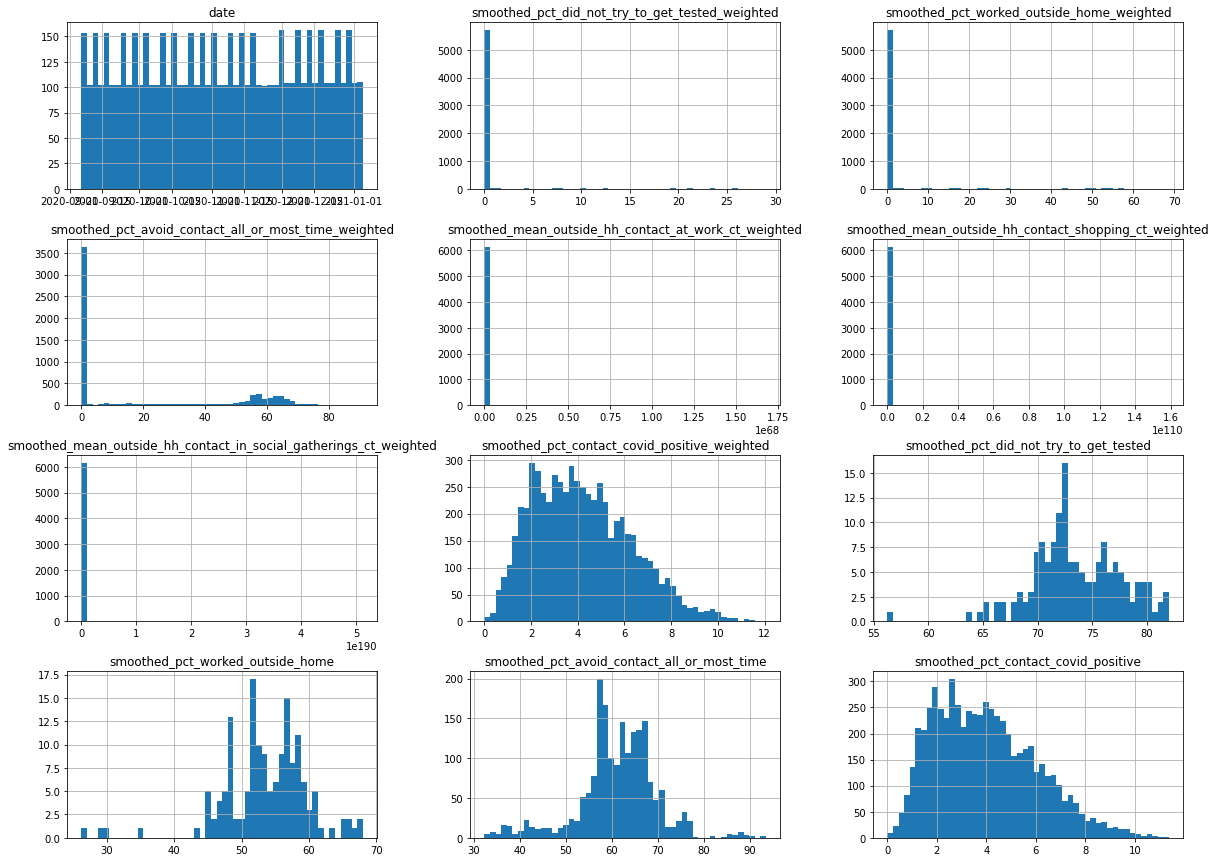

In [376]:
#draw histograms
df.hist(bins = 50, figsize=(20,15))
mpl.show()

<span style="color:blue">  Another reason to avoid weighted data, maybe with more experience and time, the usefulness of weighted data could be explored and how to work with it. Only the 'smoothed_pct_contavt_covid_positive' has data that can be used. 
    </span>

### <span style="color:Purple">Importing other datasets that are similar to interested columns from same data source </span>


In [377]:
# import dataset on mask use
mask_data=pd.read_csv('covidcast-fb-survey-smoothed_wwearing_mask-2020-09-08-to-2021-01-04 (2).csv')
mask_data.drop(mask_data.columns[0], axis=1, inplace=True)
mask_data

,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
0,ak,smoothed_wwearing_mask,2020-09-08,2020-10-27,49,73.168,4.431,100.000,state,fb-survey
1,al,smoothed_wwearing_mask,2020-09-08,2020-12-09,92,84.590,2.150,282.006,state,fb-survey
2,ar,smoothed_wwearing_mask,2020-09-08,2020-12-09,92,79.520,3.180,161.000,state,fb-survey
3,az,smoothed_wwearing_mask,2020-09-08,2020-12-09,92,84.111,1.735,443.900,state,fb-survey
4,ca,smoothed_wwearing_mask,2020-09-08,2020-12-09,92,89.721,0.708,1840.013,state,fb-survey
...,...,...,...,...,...,...,...,...,...,...
6058,vt,smoothed_wwearing_mask,2021-01-04,2021-01-09,5,95.556,0.645,1022.002,state,fb-survey
6059,wa,smoothed_wwearing_mask,2021-01-04,2021-01-09,5,94.131,0.270,7584.834,state,fb-survey
6060,wi,smoothed_wwearing_mask,2021-01-04,2021-01-09,5,89.279,0.408,5745.952,state,fb-survey
6061,wv,smoothed_wwearing_mask,2021-01-04,2021-01-09,5,90.208,0.580,2628.157,state,fb-survey


In [378]:
#Let's drop columns and rename to match other column names so it's easier to
# merge later on

mask_data['geo_value'] = mask_data['geo_value'].str.upper()
mask_data=mask_data.iloc[:,[0,2,5]]
mask_data=mask_data.rename(columns={'geo_value': 'code'})
mask_data=mask_data.rename(columns={'time_value': 'date'})
mask_data=mask_data.rename(columns={'value': 'wore_mask'})
mask_data['date'] =  pd.to_datetime(mask_data['date'], format='%Y-%m-%d')
#mask_data['date'] = pd.to_datetime(mask_data['date']) - pd.to_timedelta(7, unit='d')
#mask_data = mask_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['wore_mask'].mean().reset_index().sort_values('date')
mask_data

,code,date,wore_mask
0,AK,2020-09-08,73.168
1,AL,2020-09-08,84.590
2,AR,2020-09-08,79.520
3,AZ,2020-09-08,84.111
4,CA,2020-09-08,89.721
...,...,...,...
6058,VT,2021-01-04,95.556
6059,WA,2021-01-04,94.131
6060,WI,2021-01-04,89.279
6061,WV,2021-01-04,90.208


<span style="color:blue">  You can see the 7 day aggregation is removed. Also note smoothed weighted data that is expressed as a percentage is used. 
    </span>

In [379]:
#importing data that looks at whether participants travelled to another states in the last 5 days
# similar procedures are used when importing the multiple datasets

travel_state_data=pd.read_csv('covidcast-fb-survey-smoothed_wtravel_outside_state_5d-2020-09-07-to-2021-01-04.csv')
travel_state_data.drop(travel_state_data.columns[0], axis=1, inplace=True)
travel_state_data.iloc[:,0] = travel_state_data.iloc[:, 0].str.upper()
travel_state_data=travel_state_data.iloc[:,[0,2,5]]
travel_state_data=travel_state_data.rename(columns={'geo_value': 'code'})
travel_state_data=travel_state_data.rename(columns={'time_value': 'date'})
travel_state_data=travel_state_data.rename(columns={'value': 'travelled_outisde_state'})
travel_state_data['date'] =  pd.to_datetime(travel_state_data['date'], format='%Y-%m-%d')
#travel_state_data['date'] = pd.to_datetime(travel_state_data['date']) - pd.to_timedelta(7, unit='d')
#travel_state_data = travel_state_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['travelled_outisde_state'].mean().reset_index().sort_values('date')
travel_state_data

,code,date,travelled_outisde_state
0,AK,2020-09-07,4.138
1,AL,2020-09-07,15.291
2,AR,2020-09-07,14.160
3,AZ,2020-09-07,8.624
4,CA,2020-09-07,5.233
...,...,...,...
6115,VT,2021-01-04,13.274
6116,WA,2021-01-04,7.321
6117,WI,2021-01-04,9.607
6118,WV,2021-01-04,17.691


In [380]:
#Looks at whether participants have worked outside of the home in the past day

work_data=pd.read_csv('covidcast-fb-survey-smoothed_wwork_outside_home_1d-2020-09-08-to-2021-01-04.csv')
work_data.drop(work_data.columns[0], axis=1, inplace=True)
work_data.iloc[:,0] = work_data.iloc[:, 0].str.upper()
work_data=work_data.iloc[:,[0,2,5]]
work_data=work_data.rename(columns={'geo_value': 'code'})
work_data=work_data.rename(columns={'time_value': 'date'})
work_data=work_data.rename(columns={'value': 'worked_outisde_home'})
work_data['date'] =  pd.to_datetime(work_data['date'], format='%Y-%m-%d')
#work_data['date'] = pd.to_datetime(work_data['date']) - pd.to_timedelta(7, unit='d')
#work_data = work_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['worked_outisde_home'].mean().reset_index().sort_values('date')
work_data

,code,date,worked_outisde_home
0,AL,2020-09-08,40.040
1,AR,2020-09-08,39.612
2,AZ,2020-09-08,33.180
3,CA,2020-09-08,31.955
4,CO,2020-09-08,34.772
...,...,...,...
6057,VT,2021-01-04,23.080
6058,WA,2021-01-04,23.845
6059,WI,2021-01-04,28.160
6060,WV,2021-01-04,27.025


In [381]:
# Looks at participants who spent time with people outside their bubble in the past day

spent_time_data = pd.read_csv('covidcast-fb-survey-smoothed_wspent_time_1d-2020-09-07-to-2021-01-04.csv')
spent_time_data.drop(spent_time_data.columns[0], axis=1, inplace=True)
spent_time_data['geo_value'] =spent_time_data['geo_value'].str.upper()
spent_time_data=spent_time_data.iloc[:,[0,2,5]]
spent_time_data=spent_time_data.rename(columns={'geo_value': 'code'})
spent_time_data=spent_time_data.rename(columns={'time_value': 'date'})
spent_time_data=spent_time_data.rename(columns={'value': 'spent_time_yesterday'})
spent_time_data['date'] =  pd.to_datetime(spent_time_data['date'], format='%Y-%m-%d')
#spent_time_data['date'] = pd.to_datetime(spent_time_data['date']) - pd.to_timedelta(7, unit='d')
#spent_time_data =spent_time_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['spent_time_yesterday'].mean().reset_index().sort_values('date')
spent_time_data

,code,date,spent_time_yesterday
0,AL,2020-09-08,47.330
1,AR,2020-09-08,52.234
2,AZ,2020-09-08,44.557
3,CA,2020-09-08,38.557
4,CO,2020-09-08,44.742
...,...,...,...
6057,VT,2021-01-04,31.507
6058,WA,2021-01-04,29.505
6059,WI,2021-01-04,34.076
6060,WV,2021-01-04,33.445


In [382]:
# Looks at the whether people took public transport in the past day

public_data = pd.read_csv('covidcast-fb-survey-smoothed_wpublic_transit_1d-2020-09-08-to-2021-01-04.csv')
public_data.drop(public_data.columns[0], axis=1, inplace=True)
public_data['geo_value'] = public_data['geo_value'].str.upper()
public_data=public_data.iloc[:,[0,2,5]]
public_data=public_data.rename(columns={'geo_value': 'code'})
public_data=public_data.rename(columns={'time_value': 'date'})
public_data=public_data.rename(columns={'value': 'public_transport_yesterday'})
public_data['date'] =  pd.to_datetime(public_data['date'], format='%Y-%m-%d')
#public_data['date'] = pd.to_datetime(public_data['date']) - pd.to_timedelta(7, unit='d')
#public_data = public_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['public_transport_yesterday'].mean().reset_index().sort_values('date')
public_data

,code,date,public_transport_yesterday
0,AL,2020-09-08,2.447
1,AR,2020-09-08,2.285
2,AZ,2020-09-08,3.196
3,CA,2020-09-08,3.831
4,CO,2020-09-08,3.600
...,...,...,...
6057,VT,2021-01-04,1.246
6058,WA,2021-01-04,2.821
6059,WI,2021-01-04,2.377
6060,WV,2021-01-04,1.770


In [383]:
# Looks at whether participant would've likes a covid test

wanted_test_data = pd.read_csv('covidcast-fb-survey-smoothed_wwanted_test_14d-2020-09-08-to-2021-01-04.csv')
wanted_test_data.drop(wanted_test_data.columns[0], axis=1, inplace=True)
wanted_test_data['geo_value'] = wanted_test_data['geo_value'].str.upper()
wanted_test_data=wanted_test_data.iloc[:,[0,2,5]]
wanted_test_data=wanted_test_data.rename(columns={'geo_value': 'code'})
wanted_test_data=wanted_test_data.rename(columns={'time_value': 'date'})
wanted_test_data=wanted_test_data.rename(columns={'value': 'wanted_test'})
wanted_test_data['date'] =  pd.to_datetime(wanted_test_data['date'], format='%Y-%m-%d')
#wanted_test_data['date'] = pd.to_datetime(wanted_test_data['date']) - pd.to_timedelta(7, unit='d')
#wanted_test_data = wanted_test_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['wanted_test'].mean().reset_index().sort_values('date')
wanted_test_data

,code,date,wanted_test
0,AL,2020-09-08,7.551
1,AR,2020-09-08,7.616
2,AZ,2020-09-08,8.790
3,CA,2020-09-08,11.525
4,CO,2020-09-08,7.871
...,...,...,...
6057,VT,2021-01-04,8.637
6058,WA,2021-01-04,9.352
6059,WI,2021-01-04,7.253
6060,WV,2021-01-04,8.503


In [384]:
#looks at whether participant visited shops in the previous day 

shop_data = pd.read_csv('covidcast-fb-survey-smoothed_wshop_1d-2020-09-08-to-2021-01-04.csv')
shop_data.drop(shop_data.columns[0], axis=1, inplace=True)
shop_data['geo_value'] = shop_data['geo_value'].str.upper()
shop_data=shop_data.iloc[:,[0,2,5]]
shop_data=shop_data.rename(columns={'geo_value': 'code'})
shop_data=shop_data.rename(columns={'time_value': 'date'})
shop_data=shop_data.rename(columns={'value': 'went_to_shops_yesterday'})
shop_data['date'] =  pd.to_datetime(shop_data['date'], format='%Y-%m-%d')
#shop_data['date'] = pd.to_datetime(shop_data['date']) - pd.to_timedelta(7, unit='d')
#shop_data = shop_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['went_to_shops_yesterday'].mean().reset_index().sort_values('date')
shop_data

,code,date,went_to_shops_yesterday
0,AL,2020-09-08,60.514
1,AR,2020-09-08,61.103
2,AZ,2020-09-08,61.155
3,CA,2020-09-08,60.112
4,CO,2020-09-08,59.301
...,...,...,...
6057,VT,2021-01-04,53.128
6058,WA,2021-01-04,51.101
6059,WI,2021-01-04,50.860
6060,WV,2021-01-04,50.033


In [385]:
# Looks at whether participants visited restaurant in the past day

restaurant_data = pd.read_csv('covidcast-fb-survey-smoothed_wrestaurant_1d-2020-09-08-to-2021-01-04.csv')
restaurant_data.drop(restaurant_data.columns[0], axis=1, inplace=True)
restaurant_data['geo_value'] = restaurant_data['geo_value'].str.upper()
restaurant_data=restaurant_data.iloc[:,[0,2,5]]
restaurant_data=restaurant_data.rename(columns={'geo_value': 'code'})
restaurant_data=restaurant_data.rename(columns={'time_value': 'date'})
restaurant_data=restaurant_data.rename(columns={'value': 'went_to_restaurant_yesterday'})
restaurant_data['date'] =  pd.to_datetime(restaurant_data['date'], format='%Y-%m-%d')
#restaurant_data['date'] = pd.to_datetime(restaurant_data['date']) - pd.to_timedelta(7, unit='d')
#restaurant_data =restaurant_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['went_to_restaurant_yesterday'].mean().reset_index().sort_values('date')
restaurant_data

,code,date,went_to_restaurant_yesterday
0,AL,2020-09-08,27.834
1,AR,2020-09-08,23.104
2,AZ,2020-09-08,24.363
3,CA,2020-09-08,17.618
4,CO,2020-09-08,24.827
...,...,...,...
6057,VT,2021-01-04,9.764
6058,WA,2021-01-04,7.280
6059,WI,2021-01-04,15.933
6060,WV,2021-01-04,14.658


In [386]:
#Looked at participants and whether they attended a large event in the past day 

event_data = pd.read_csv('covidcast-fb-survey-smoothed_wlarge_event_1d-2020-09-08-to-2021-01-04.csv')
event_data.drop(event_data.columns[0], axis=1, inplace=True)
event_data['geo_value'] = event_data['geo_value'].str.upper()
event_data=event_data.iloc[:,[0,2,5]]
event_data=event_data.rename(columns={'geo_value': 'code'})
event_data=event_data.rename(columns={'time_value': 'date'})
event_data=event_data.rename(columns={'value': 'went_to_event_yesterday'})
event_data['date'] =  pd.to_datetime(event_data['date'], format='%Y-%m-%d')
#event_data['date'] = pd.to_datetime(event_data['date']) - pd.to_timedelta(7, unit='d')
#event_data= event_data.groupby(['code', pd.Grouper(key='date', freq='W-MON')])['went_to_event_yesterday'].mean().reset_index().sort_values('date')
event_data

,code,date,went_to_event_yesterday
0,AL,2020-09-08,21.420
1,AR,2020-09-08,19.967
2,AZ,2020-09-08,13.707
3,CA,2020-09-08,9.342
4,CO,2020-09-08,16.295
...,...,...,...
6057,VT,2021-01-04,3.960
6058,WA,2021-01-04,5.245
6059,WI,2021-01-04,9.357
6060,WV,2021-01-04,7.694


In [389]:
#The new datasets that have been imported are to be merged. 

imported_merged = mask_data.merge(public_data, on=['date', 'code']).merge(shop_data, on=['date', 'code']).merge(event_data, on=['date', 'code']).merge(restaurant_data, on=['date', 'code']).merge(wanted_test_data, on=['date', 'code']).merge(spent_time_data, on=['date', 'code']).merge(travel_state_data, on=['date', 'code']).merge(work_data, on=['date', 'code'])
imported_merged

,code,date,wore_mask,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home
0,AL,2020-09-08,84.590,2.447,60.514,21.420,27.834,7.551,47.330,15.560,40.040
1,AR,2020-09-08,79.520,2.285,61.103,19.967,23.104,7.616,52.234,14.158,39.612
2,AZ,2020-09-08,84.111,3.196,61.155,13.707,24.363,8.790,44.557,8.958,33.180
3,CA,2020-09-08,89.721,3.831,60.112,9.342,17.618,11.525,38.557,5.170,31.955
4,CO,2020-09-08,82.098,3.600,59.301,16.295,24.827,7.871,44.742,8.544,34.772
...,...,...,...,...,...,...,...,...,...,...,...
6057,VT,2021-01-04,95.556,1.246,53.128,3.960,9.764,8.637,31.507,13.274,23.080
6058,WA,2021-01-04,94.131,2.821,51.101,5.245,7.280,9.352,29.505,7.321,23.845
6059,WI,2021-01-04,89.279,2.377,50.860,9.357,15.933,7.253,34.076,9.607,28.160
6060,WV,2021-01-04,90.208,1.770,50.033,7.694,14.658,8.503,33.445,17.691,27.025


array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'wore_mask'}>,
        <AxesSubplot:title={'center':'public_transport_yesterday'}>],
       [<AxesSubplot:title={'center':'went_to_shops_yesterday'}>,
        <AxesSubplot:title={'center':'went_to_event_yesterday'}>,
        <AxesSubplot:title={'center':'went_to_restaurant_yesterday'}>],
       [<AxesSubplot:title={'center':'wanted_test'}>,
        <AxesSubplot:title={'center':'spent_time_yesterday'}>,
        <AxesSubplot:title={'center':'travelled_outisde_state'}>],
       [<AxesSubplot:title={'center':'worked_outisde_home'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

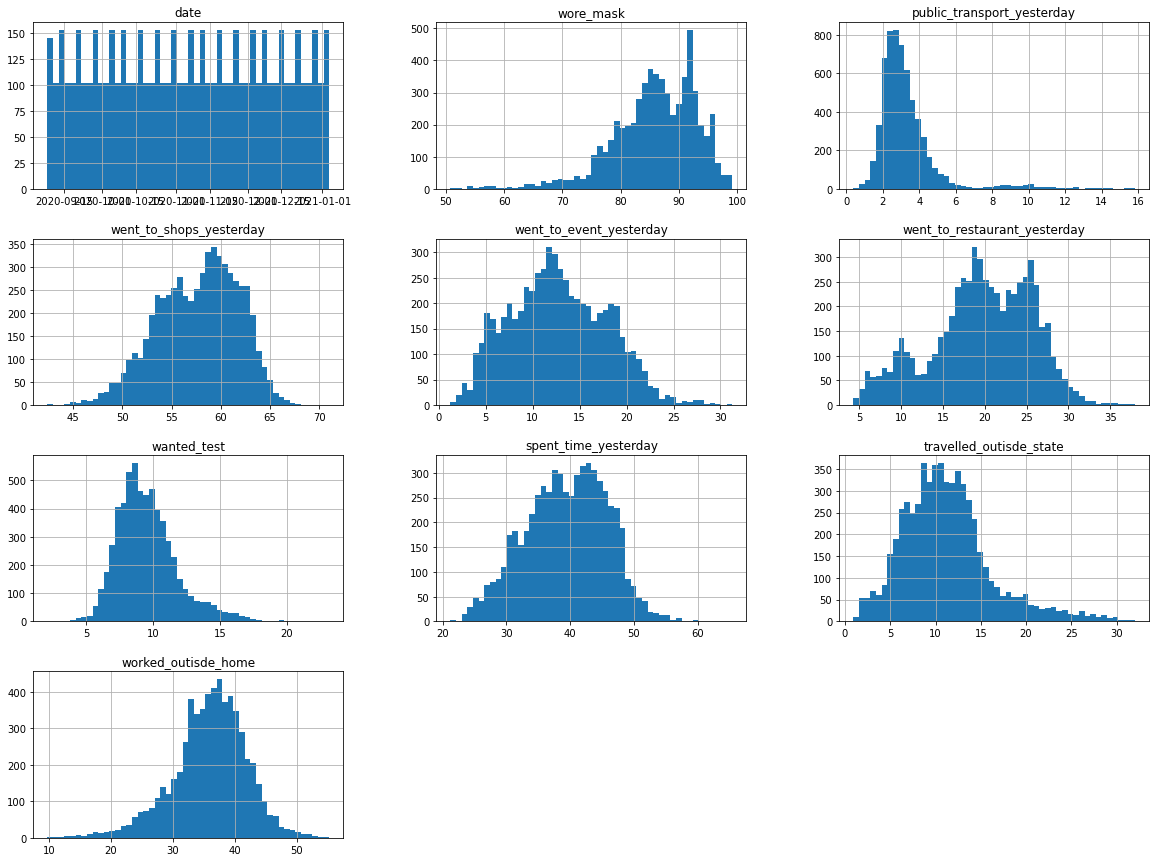

In [390]:
imported_merged.hist(bins = 50, figsize=(20,15))

## <span style="color:purple">  Importing a temporary dataset for ease of merging the df to the cases and deaths
    

In [427]:
# Later you will realise that the cases/deaths dataset has statecode described by 
# name whereas as the above recently imported behaviour dataset is only by initials so this step is necassary for joining
# read the data in and drop unecassary columns 

state=pd.read_csv('state_names.csv')
state=state.rename(columns={'Code': 'code'})
state=state.rename(columns={'State': 'Province_State'})
state = state.drop('Abbrev', 1)
state

/var/folders/zl/h52nhq_16f15jmzlb8z5lnv00000gn/T/ipykernel_46298/1026989276.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  state = state.drop('Abbrev', 1)


,Province_State,code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [428]:
#state=pd.read_csv('state_names.csv')

#state = state.drop('Abbrev', 1)
#state

###  <span style="color:purple">  Importing JHU covid cases set

In [429]:
import pandas as pd 
cases=pd.read_csv('confirmed_US.csv')
cases

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/28/21,6/29/21,6/30/21,07/01/2021,07/02/2021,07/03/2021,07/04/2021,07/05/2021,07/06/2021,07/07/2021
0,84001001,US,USA,840,1001.000,Autauga,Alabama,US,32.540,-86.644,...,7247,7247,7257,7257,7262,7262,7262,7262,7262,7277
1,84001003,US,USA,840,1003.000,Baldwin,Alabama,US,30.728,-87.722,...,21985,21985,22027,22027,22043,22043,22043,22043,22043,22154
2,84001005,US,USA,840,1005.000,Barbour,Alabama,US,31.868,-85.387,...,2345,2345,2346,2346,2347,2347,2347,2347,2347,2354
3,84001007,US,USA,840,1007.000,Bibb,Alabama,US,32.996,-87.125,...,2687,2687,2693,2693,2693,2693,2693,2693,2693,2699
4,84001009,US,USA,840,1009.000,Blount,Alabama,US,33.982,-86.568,...,6975,6975,6987,6987,6988,6988,6988,6988,6988,7013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.000,Teton,Wyoming,US,43.935,-110.589,...,3801,3801,3801,3801,3802,3802,3802,3802,3804,3805
3338,84056041,US,USA,840,56041.000,Uinta,Wyoming,US,41.288,-110.548,...,2318,2319,2320,2320,2321,2321,2321,2321,2325,2327
3339,84090056,US,USA,840,90056.000,Unassigned,Wyoming,US,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.000,Washakie,Wyoming,US,43.905,-107.680,...,926,926,926,926,927,927,927,927,927,927


In [430]:
# To make the data non-cumalative, a broken down apparach can be seen for deaths dataset below

#firstly lets take a chunk of the data that we want to make non-cumaltive 
# then transpose that data 
casesT = cases.iloc[:,12:].T

#this is the main part of filling the rows with the differences to find non
# non-cumalative amounts 
casesT=casesT.diff().fillna(casesT).reset_index()

#transpose data once again and rename columns and drop index
casesT=casesT.T
casesT=casesT.rename(columns=casesT.iloc[0]).drop(casesT.index[0])

# now concatenate back to original df 
cases_temp=  pd.concat([cases.iloc[:,:12], casesT], axis=1)

#remove excess unwanted columns from original df that were cumalative 
dates = cases_temp.columns[12:]

#melt the data to make it better to read and merge with previous datasets 
cases=cases_temp.melt(['FIPS', 'Province_State', 'Lat', 'Long_'],  value_vars=dates,  var_name='Date', value_name='cases')
cases

,FIPS,Province_State,Lat,Long_,Date,cases
0,1001.000,Alabama,32.540,-86.644,1/23/20,0.000
1,1003.000,Alabama,30.728,-87.722,1/23/20,0.000
2,1005.000,Alabama,31.868,-85.387,1/23/20,0.000
3,1007.000,Alabama,32.996,-87.125,1/23/20,0.000
4,1009.000,Alabama,33.982,-86.568,1/23/20,0.000
...,...,...,...,...,...,...
1777939,56039.000,Wyoming,43.935,-110.589,07/07/2021,1.000
1777940,56041.000,Wyoming,41.288,-110.548,07/07/2021,2.000
1777941,90056.000,Wyoming,0.000,0.000,07/07/2021,0.000
1777942,56043.000,Wyoming,43.905,-107.680,07/07/2021,0.000


In [431]:
#cases34 = cases.iloc[:,12:].T

#cases34=cases34.diff().fillna(cases34).reset_index()

#cases34=cases34.T
#cases34=cases34.rename(columns=cases34.iloc[0]).drop(cases34.index[0])

#cases56=  pd.concat([cases.iloc[:,:12], cases34], axis=1)

#dates = cases56.columns[12:]
#cases=cases56.melt(['FIPS', 'Province_State', 'Lat', 'Long_'],  value_vars=dates,  var_name='Date', value_name='cases')
#cases

In [432]:
# make date column datetime format
cases['Date'] = pd.to_datetime(cases['Date'], errors='coerce')

cases = cases.dropna(subset=['Date'])

cases

,FIPS,Province_State,Lat,Long_,Date,cases
0,1001.000,Alabama,32.540,-86.644,2020-01-23,0.000
1,1003.000,Alabama,30.728,-87.722,2020-01-23,0.000
2,1005.000,Alabama,31.868,-85.387,2020-01-23,0.000
3,1007.000,Alabama,32.996,-87.125,2020-01-23,0.000
4,1009.000,Alabama,33.982,-86.568,2020-01-23,0.000
...,...,...,...,...,...,...
1777939,56039.000,Wyoming,43.935,-110.589,2021-07-07,1.000
1777940,56041.000,Wyoming,41.288,-110.548,2021-07-07,2.000
1777941,90056.000,Wyoming,0.000,0.000,2021-07-07,0.000
1777942,56043.000,Wyoming,43.905,-107.680,2021-07-07,0.000


In [433]:
# lets narrow to interested columns by grouping by interested variables 
cases = cases.groupby(['Province_State', pd.Grouper(key='Date')])['cases'].sum().reset_index().sort_values('Date')
cases

,Province_State,Date,cases
0,Alabama,2020-01-23,0.000
18620,New Mexico,2020-01-23,0.000
6916,Grand Princess,2020-01-23,0.000
7448,Guam,2020-01-23,0.000
23408,Puerto Rico,2020-01-23,0.000
...,...,...,...
17555,Nevada,2021-07-07,453.000
17023,Nebraska,2021-07-07,0.000
16491,Montana,2021-07-07,151.000
14895,Minnesota,2021-07-07,231.000


In [434]:
#7 day aggregation was removed

#cases['Date'] = pd.to_datetime(cases['Date']) - pd.to_timedelta(7, unit='d')
#cases = cases.groupby(['Province_State', pd.Grouper(key='Date', freq='W-MON')])['cases'].sum().reset_index().sort_values('Date')
#cases

In [436]:
#Lets add the state code for ease of merging

cases['code'] = cases['Province_State'].map(state.set_index('Province_State')['code'])
cases

,Province_State,Date,cases,code
0,Alabama,2020-01-23,0.000,AL
18620,New Mexico,2020-01-23,0.000,NM
6916,Grand Princess,2020-01-23,0.000,NaN
7448,Guam,2020-01-23,0.000,NaN
23408,Puerto Rico,2020-01-23,0.000,NaN
...,...,...,...,...
17555,Nevada,2021-07-07,453.000,NV
17023,Nebraska,2021-07-07,0.000,NE
16491,Montana,2021-07-07,151.000,MT
14895,Minnesota,2021-07-07,231.000,MN


In [437]:
#Let's add a lag as symptoms generally tend to show 7 days after catching it
cases=cases.merge(cases.assign(Date = cases.Date+pd.Timedelta(days=7)), on=['Date', 'Province_State', 'code'], how='left', suffixes=['', '_7daylag'])
cases

,Province_State,Date,cases,code,cases_7daylag
0,Alabama,2020-01-23,0.000,AL,NaN
1,New Mexico,2020-01-23,0.000,NM,NaN
2,Grand Princess,2020-01-23,0.000,NaN,NaN
3,Guam,2020-01-23,0.000,NaN,NaN
4,Puerto Rico,2020-01-23,0.000,NaN,NaN
...,...,...,...,...,...
30851,Nevada,2021-07-07,453.000,NV,558.000
30852,Nebraska,2021-07-07,0.000,NE,84.000
30853,Montana,2021-07-07,151.000,MT,65.000
30854,Minnesota,2021-07-07,231.000,MN,68.000


In [40]:
#narrow done to dates imported datasets are available from which is 8th September 2020 onwards
cases=cases[cases.Date.between('2020-9-7', '2021-1-4')]
cases

,Province_State,Date,cases,code,cases_7daylag
13224,District of Columbia,2020-09-07,36.0,DC,33.0
13225,Maine,2020-09-07,18.0,ME,15.0
13226,Grand Princess,2020-09-07,0.0,NaN,0.0
13227,Minnesota,2020-09-07,638.0,MN,675.0
13228,Nevada,2020-09-07,357.0,NV,320.0
...,...,...,...,...,...
20179,Michigan,2021-01-04,5490.0,MI,3550.0
20180,Kentucky,2021-01-04,2317.0,KY,1454.0
20181,Connecticut,2021-01-04,4516.0,CT,8457.0
20182,Alaska,2021-01-04,264.0,AK,130.0


## <font color = purple> Importing JHU covid deaths set

In [496]:
#read dataset 

deaths=pd.read_csv('deaths_US.csv')
deaths


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/28/21,6/29/21,6/30/21,07/01/2021,07/02/2021,07/03/2021,07/04/2021,07/05/2021,07/06/2021,07/07/2021
0,84001001,US,USA,840,1001.000,Autauga,Alabama,US,32.540,-86.644,...,113,113,113,113,113,113,113,113,113,113
1,84001003,US,USA,840,1003.000,Baldwin,Alabama,US,30.728,-87.722,...,314,314,315,315,315,315,315,315,315,316
2,84001005,US,USA,840,1005.000,Barbour,Alabama,US,31.868,-85.387,...,60,60,60,60,60,60,60,60,60,60
3,84001007,US,USA,840,1007.000,Bibb,Alabama,US,32.996,-87.125,...,64,64,64,64,64,64,64,64,64,65
4,84001009,US,USA,840,1009.000,Blount,Alabama,US,33.982,-86.568,...,139,139,139,139,139,139,139,139,139,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.000,Teton,Wyoming,US,43.935,-110.589,...,11,11,11,11,11,11,11,11,11,11
3338,84056041,US,USA,840,56041.000,Uinta,Wyoming,US,41.288,-110.548,...,13,13,13,13,13,13,13,13,13,13
3339,84090056,US,USA,840,90056.000,Unassigned,Wyoming,US,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.000,Washakie,Wyoming,US,43.905,-107.680,...,26,26,26,26,26,26,26,26,26,26


In [497]:
#check datatypes 

deaths.dtypes

UID             int64
iso2           object
iso3           object
code3           int64
FIPS          float64
               ...   
07/03/2021      int64
07/04/2021      int64
07/05/2021      int64
07/06/2021      int64
07/07/2021      int64
Length: 545, dtype: object

In [498]:
# repeat same procedure as done for cases, reduce dataset to just cumalative data
deaths.iloc[:,12:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/28/21,6/29/21,6/30/21,07/01/2021,07/02/2021,07/03/2021,07/04/2021,07/05/2021,07/06/2021,07/07/2021
0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
1,0,0,0,0,0,0,0,0,0,0,...,314,314,315,315,315,315,315,315,315,316
2,0,0,0,0,0,0,0,0,0,0,...,60,60,60,60,60,60,60,60,60,60
3,0,0,0,0,0,0,0,0,0,0,...,64,64,64,64,64,64,64,64,64,65
4,0,0,0,0,0,0,0,0,0,0,...,139,139,139,139,139,139,139,139,139,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
3338,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
3339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26


In [499]:
#Transpose the data to work on the actual non-cumalative values 
deathsT = deaths.iloc[:,12:].T

#replace values with difference from adjacent value, or reset to original df 
#reset index
deathsT=deathsT.diff().fillna(deathsT).reset_index()

# get a view of it
deathsT.tail(20)

,index,0,1,2,3,4,5,6,7,8,...,3332,3333,3334,3335,3336,3337,3338,3339,3340,3341
513,6/18/21,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
514,6/19/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
515,6/20/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
516,6/21/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
517,6/22/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
518,6/23/21,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
519,6/24/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
520,6/25/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
521,6/26/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
522,6/27/21,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [500]:
# Transpose data back to original form 
deathsT=deathsT.T

#Rename columns 
deathsT=deathsT.rename(columns=deathsT.iloc[0]).drop(deathsT.index[0])
deathsT

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/28/21,6/29/21,6/30/21,07/01/2021,07/02/2021,07/03/2021,07/04/2021,07/05/2021,07/06/2021,07/07/2021
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3338,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3339,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3340,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [501]:
#Concatenate the non-cumalative dataset to original df 
deaths_temp=  pd.concat([deaths.iloc[:,:12], deathsT], axis=1)
deaths_temp

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/28/21,6/29/21,6/30/21,07/01/2021,07/02/2021,07/03/2021,07/04/2021,07/05/2021,07/06/2021,07/07/2021
0,84001001,US,USA,840,1001.000,Autauga,Alabama,US,32.540,-86.644,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,84001003,US,USA,840,1003.000,Baldwin,Alabama,US,30.728,-87.722,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
2,84001005,US,USA,840,1005.000,Barbour,Alabama,US,31.868,-85.387,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,84001007,US,USA,840,1007.000,Bibb,Alabama,US,32.996,-87.125,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,84001009,US,USA,840,1009.000,Blount,Alabama,US,33.982,-86.568,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.000,Teton,Wyoming,US,43.935,-110.589,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3338,84056041,US,USA,840,56041.000,Uinta,Wyoming,US,41.288,-110.548,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3339,84090056,US,USA,840,90056.000,Unassigned,Wyoming,US,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3340,84056043,US,USA,840,56043.000,Washakie,Wyoming,US,43.905,-107.680,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [502]:
#give correct headings (dates from oroginal df)
dates = deaths_temp.columns[12:]

#melt data to get the desired structure 
deaths=deaths56.melt(['FIPS', 'Province_State', 'Population', 'Lat', 'Long_'],  value_vars=dates,  var_name='Date', value_name='deaths')
deaths
  
  
 

,FIPS,Province_State,Population,Lat,Long_,Date,deaths
0,1001.000,Alabama,55869,32.540,-86.644,1/22/20,0.000
1,1003.000,Alabama,223234,30.728,-87.722,1/22/20,0.000
2,1005.000,Alabama,24686,31.868,-85.387,1/22/20,0.000
3,1007.000,Alabama,22394,32.996,-87.125,1/22/20,0.000
4,1009.000,Alabama,57826,33.982,-86.568,1/22/20,0.000
...,...,...,...,...,...,...,...
1781281,56039.000,Wyoming,23464,43.935,-110.589,07/07/2021,0.000
1781282,56041.000,Wyoming,20226,41.288,-110.548,07/07/2021,0.000
1781283,90056.000,Wyoming,0,0.000,0.000,07/07/2021,0.000
1781284,56043.000,Wyoming,7805,43.905,-107.680,07/07/2021,0.000


In [503]:
#convert dates column to date time format
deaths['Date'] = pd.to_datetime(deaths['Date'], errors='coerce')
deaths = deaths.dropna(subset=['Date'])

In [504]:
# Let's add a 21 death day lag, becuase patients typically died within 21 days of catching covid

deaths=deaths.merge(deaths.assign(Date = deaths.Date+pd.Timedelta(days=21)), 
         on=['Date', 'Province_State', 'Population', "Lat", "Long_", 'FIPS'],
         how='left', suffixes=['', '_21daylag'])
deaths

,FIPS,Province_State,Population,Lat,Long_,Date,deaths,deaths_21daylag
0,1001.000,Alabama,55869,32.540,-86.644,2020-01-22,0.000,NaN
1,1003.000,Alabama,223234,30.728,-87.722,2020-01-22,0.000,NaN
2,1005.000,Alabama,24686,31.868,-85.387,2020-01-22,0.000,NaN
3,1007.000,Alabama,22394,32.996,-87.125,2020-01-22,0.000,NaN
4,1009.000,Alabama,57826,33.982,-86.568,2020-01-22,0.000,NaN
...,...,...,...,...,...,...,...,...
1782305,56039.000,Wyoming,23464,43.935,-110.589,2021-07-07,0.000,0.000
1782306,56041.000,Wyoming,20226,41.288,-110.548,2021-07-07,0.000,0.000
1782307,90056.000,Wyoming,0,0.000,0.000,2021-07-07,0.000,0.000
1782308,56043.000,Wyoming,7805,43.905,-107.680,2021-07-07,0.000,0.000


In [505]:
# narrow down to interested dates 
deaths=deaths[deaths.Date.between('2020-9-7', '2021-1-4')]
deaths

,FIPS,Province_State,Population,Lat,Long_,Date,deaths,deaths_21daylag
765734,1001.000,Alabama,55869,32.540,-86.644,2020-09-07,0.000,0.000
765735,1003.000,Alabama,223234,30.728,-87.722,2020-09-07,0.000,0.000
765736,1005.000,Alabama,24686,31.868,-85.387,2020-09-07,0.000,0.000
765737,1007.000,Alabama,22394,32.996,-87.125,2020-09-07,0.000,0.000
765738,1009.000,Alabama,57826,33.982,-86.568,2020-09-07,0.000,0.000
...,...,...,...,...,...,...,...,...
1167009,56039.000,Wyoming,23464,43.935,-110.589,2021-01-04,0.000,0.000
1167010,56041.000,Wyoming,20226,41.288,-110.548,2021-01-04,0.000,0.000
1167011,90056.000,Wyoming,0,0.000,0.000,2021-01-04,0.000,0.000
1167012,56043.000,Wyoming,7805,43.905,-107.680,2021-01-04,0.000,0.000


In [506]:
# Lets plot a map of deaths 

#Let's make use of available latitide and longitude columns 
deaths2=deaths.groupby(['FIPS','Lat','Long_']).agg(
     deaths = ('deaths','sum'),
     population = ('Population','sum'),
     ).reset_index()
deaths2

,FIPS,Lat,Long_,deaths,population
0,60.000,-14.271,-170.132,0.000,6676920
1,66.000,13.444,144.794,107.000,19707480
2,69.000,15.098,145.674,0.000,6617280
3,78.000,18.336,-64.896,7.000,12872160
4,1001.000,32.540,-86.644,27.000,6704280
...,...,...,...,...,...
3327,90053.000,0.000,0.000,3.000,0
3328,90054.000,0.000,0.000,0.000,0
3329,90055.000,0.000,0.000,0.000,0
3330,90056.000,0.000,0.000,0.000,0


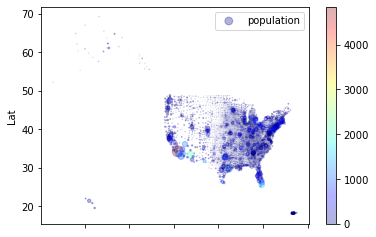

In [507]:
#lets account for only america and not the cruises by taking extreme coordinates into account
deaths2 = deaths2[deaths2['Lat']  > 10]
deaths2 = deaths2[deaths2['Long_']  <50]

#plot a scatter plot with a colour bar
deaths2.plot(kind = 'scatter', x = 'Long_', y='Lat', alpha = 0.3, s =deaths2['population']/10000000
            ,
label = 'population',
c = deaths2['deaths'], cmap = mpl.get_cmap('jet'), colorbar =True)
mpl.legend()

<span style="color:blue">  You can see some of the highest frequency of deaths occur around the bottom south west coast near California. But there are greater population densities towards the east of America 
    </span>


In [508]:
#Lets assemble the final dataset we're interested inby grouping by desired features

deaths1=deaths.groupby(['Province_State', pd.Grouper(key='Date')]).agg({'deaths_21daylag':'sum', 'deaths':'sum','Population':'sum', 'Lat':'mean', 'Long_':'mean'}).sort_values('Date').reset_index()
deaths1

,Province_State,Date,deaths_21daylag,deaths,Population,Lat,Long_
0,Alabama,2020-09-07,27.000,0.000,4903185,31.931,-84.197
1,Guam,2020-09-07,0.000,0.000,164229,13.444,144.794
2,Rhode Island,2020-09-07,2.000,1.000,1059361,29.754,-51.046
3,Grand Princess,2020-09-07,0.000,0.000,0,0.000,0.000
4,South Carolina,2020-09-07,19.000,20.000,5148714,32.543,-77.609
...,...,...,...,...,...,...,...
6955,Nevada,2021-01-04,9.000,26.000,3080156,35.124,-105.189
6956,Nebraska,2021-01-04,45.000,10.000,1934408,40.452,-96.954
6957,Montana,2021-01-04,0.000,3.000,1068778,45.355,-105.918
6958,Minnesota,2021-01-04,18.000,13.000,5639632,44.528,-92.309


In [509]:
#Merge the cases and deaths dataset
cases_merged=cases.merge(deaths1.reset_index())

cases_merged

,Province_State,Date,cases,code,cases_7daylag,index,deaths_21daylag,deaths,Population,Lat,Long_
0,District of Columbia,2020-09-07,36.000,DC,33.000,9,0.000,0.000,705749,12.968,-25.672
1,Maine,2020-09-07,18.000,ME,15.000,42,0.000,0.000,1344212,39.722,-61.799
2,Grand Princess,2020-09-07,0.000,NaN,0.000,3,0.000,0.000,0,0.000,0.000
3,Minnesota,2020-09-07,638.000,MN,675.000,34,6.000,3.000,5639632,44.528,-92.309
4,Nevada,2020-09-07,357.000,NV,320.000,33,5.000,4.000,3080156,35.124,-105.189
...,...,...,...,...,...,...,...,...,...,...,...
6955,Michigan,2021-01-04,5490.000,MI,3550.000,6931,96.000,86.000,9986857,41.074,-79.439
6956,Kentucky,2021-01-04,2317.000,KY,1454.000,6907,17.000,26.000,4467673,37.005,-83.803
6957,Connecticut,2021-01-04,4516.000,CT,8457.000,6921,81.000,69.000,3565287,33.291,-58.125
6958,Alaska,2021-01-04,264.000,AK,130.000,6927,0.000,3.000,740995,56.628,-139.572


In [510]:
#Ensure date column is datetime format 
cases_merged['Date'] =  pd.to_datetime(cases_merged['Date'], format='%Y-%m-%d')
cases_merged

,Province_State,Date,cases,code,cases_7daylag,index,deaths_21daylag,deaths,Population,Lat,Long_
0,District of Columbia,2020-09-07,36.000,DC,33.000,9,0.000,0.000,705749,12.968,-25.672
1,Maine,2020-09-07,18.000,ME,15.000,42,0.000,0.000,1344212,39.722,-61.799
2,Grand Princess,2020-09-07,0.000,NaN,0.000,3,0.000,0.000,0,0.000,0.000
3,Minnesota,2020-09-07,638.000,MN,675.000,34,6.000,3.000,5639632,44.528,-92.309
4,Nevada,2020-09-07,357.000,NV,320.000,33,5.000,4.000,3080156,35.124,-105.189
...,...,...,...,...,...,...,...,...,...,...,...
6955,Michigan,2021-01-04,5490.000,MI,3550.000,6931,96.000,86.000,9986857,41.074,-79.439
6956,Kentucky,2021-01-04,2317.000,KY,1454.000,6907,17.000,26.000,4467673,37.005,-83.803
6957,Connecticut,2021-01-04,4516.000,CT,8457.000,6921,81.000,69.000,3565287,33.291,-58.125
6958,Alaska,2021-01-04,264.000,AK,130.000,6927,0.000,3.000,740995,56.628,-139.572


In [511]:
#remove unwanted index column 
cases_merged=cases_merged.drop(cases_merged.columns[5], axis=1)
cases_merged

,Province_State,Date,cases,code,cases_7daylag,deaths_21daylag,deaths,Population,Lat,Long_
0,District of Columbia,2020-09-07,36.000,DC,33.000,0.000,0.000,705749,12.968,-25.672
1,Maine,2020-09-07,18.000,ME,15.000,0.000,0.000,1344212,39.722,-61.799
2,Grand Princess,2020-09-07,0.000,NaN,0.000,0.000,0.000,0,0.000,0.000
3,Minnesota,2020-09-07,638.000,MN,675.000,6.000,3.000,5639632,44.528,-92.309
4,Nevada,2020-09-07,357.000,NV,320.000,5.000,4.000,3080156,35.124,-105.189
...,...,...,...,...,...,...,...,...,...,...
6955,Michigan,2021-01-04,5490.000,MI,3550.000,96.000,86.000,9986857,41.074,-79.439
6956,Kentucky,2021-01-04,2317.000,KY,1454.000,17.000,26.000,4467673,37.005,-83.803
6957,Connecticut,2021-01-04,4516.000,CT,8457.000,81.000,69.000,3565287,33.291,-58.125
6958,Alaska,2021-01-04,264.000,AK,130.000,0.000,3.000,740995,56.628,-139.572


In [512]:
#convert column name to similar names as other ones for ease when merging
cases_merged=cases_merged.rename(columns={'Date': 'date'})
cases_merged

,Province_State,date,cases,code,cases_7daylag,deaths_21daylag,deaths,Population,Lat,Long_
0,District of Columbia,2020-09-07,36.000,DC,33.000,0.000,0.000,705749,12.968,-25.672
1,Maine,2020-09-07,18.000,ME,15.000,0.000,0.000,1344212,39.722,-61.799
2,Grand Princess,2020-09-07,0.000,NaN,0.000,0.000,0.000,0,0.000,0.000
3,Minnesota,2020-09-07,638.000,MN,675.000,6.000,3.000,5639632,44.528,-92.309
4,Nevada,2020-09-07,357.000,NV,320.000,5.000,4.000,3080156,35.124,-105.189
...,...,...,...,...,...,...,...,...,...,...
6955,Michigan,2021-01-04,5490.000,MI,3550.000,96.000,86.000,9986857,41.074,-79.439
6956,Kentucky,2021-01-04,2317.000,KY,1454.000,17.000,26.000,4467673,37.005,-83.803
6957,Connecticut,2021-01-04,4516.000,CT,8457.000,81.000,69.000,3565287,33.291,-58.125
6958,Alaska,2021-01-04,264.000,AK,130.000,0.000,3.000,740995,56.628,-139.572


In [513]:
#check the datatypes 
cases_merged.dtypes

Province_State             object
date               datetime64[ns]
cases                      object
code                       object
cases_7daylag              object
deaths_21daylag            object
deaths                     object
Population                  int64
Lat                       float64
Long_                     float64
dtype: object

In [518]:
#join the cases and deaths merged dataset to foundation df that we started off
combined=df.merge(cases_merged.reset_index())
combined

,code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,...,smoothed_pct_contact_covid_positive,index,Province_State,cases,cases_7daylag,deaths_21daylag,deaths,Population,Lat,Long_
0,NM,2020-09-07,21.984,54.736,49.034,13.718,12.904,6.478,2.786,73.688,...,2.407,15,New Mexico,37.000,69.000,4.000,4.000,2096829,32.575,-99.836
1,NC,2020-09-07,21.123,54.034,43.854,303.099,28716666666666668032.000,287469249995.363,3.306,74.275,...,2.978,12,North Carolina,817.000,1392.000,1.000,7.000,10488084,34.926,-77.942
2,UT,2020-09-07,27.614,59.794,35.474,164.832,11.995,6.729,3.295,75.189,...,3.276,38,Utah,373.000,253.000,1.000,1.000,3205958,37.528,-105.528
3,KY,2020-09-07,24.352,56.007,43.603,6828580.985,160.961,176011.731,3.454,69.541,...,3.297,32,Kentucky,290.000,365.000,8.000,0.000,4467673,37.005,-83.803
4,AZ,2020-09-07,21.038,50.293,47.629,45302332.140,268786.015,184.063,3.695,72.547,...,3.412,56,Arizona,197.000,174.000,0.000,-2.000,7278717,29.714,-98.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,KS,2021-01-04,0.000,0.000,57.925,6.157,10.628,20.852,5.900,NaN,...,5.855,6929,Kansas,3950.000,6046.000,37.000,18.000,2913314,37.766,-96.251
6064,VA,2021-01-04,0.000,0.000,63.541,5.153,3128.816,312.590,5.065,NaN,...,4.614,6911,Virginia,3771.000,2599.000,3.000,8.000,8535519,37.010,-77.351
6065,IN,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,...,5.882,6907,Indiana,3617.000,2465.000,107.000,110.000,6732219,38.990,-84.384
6066,IL,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,...,4.308,6903,Illinois,5059.000,4453.000,116.000,90.000,12671821,39.077,-87.463


In [519]:
#round it to 4 dp 
combined.round(4)

,code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,...,smoothed_pct_contact_covid_positive,index,Province_State,cases,cases_7daylag,deaths_21daylag,deaths,Population,Lat,Long_
0,NM,2020-09-07,21.984,54.736,49.034,13.718,12.904,6.478,2.786,73.688,...,2.407,15,New Mexico,37.000,69.000,4.000,4.000,2096829,32.575,-99.836
1,NC,2020-09-07,21.123,54.034,43.854,303.099,28716666666666668032.000,287469249995.363,3.306,74.275,...,2.978,12,North Carolina,817.000,1392.000,1.000,7.000,10488084,34.926,-77.942
2,UT,2020-09-07,27.614,59.794,35.474,164.832,11.995,6.729,3.295,75.189,...,3.276,38,Utah,373.000,253.000,1.000,1.000,3205958,37.528,-105.528
3,KY,2020-09-07,24.352,56.007,43.603,6828580.985,160.961,176011.731,3.454,69.541,...,3.297,32,Kentucky,290.000,365.000,8.000,0.000,4467673,37.005,-83.803
4,AZ,2020-09-07,21.038,50.292,47.629,45302332.140,268786.015,184.064,3.695,72.547,...,3.412,56,Arizona,197.000,174.000,0.000,-2.000,7278717,29.714,-98.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,KS,2021-01-04,0.000,0.000,57.925,6.157,10.628,20.852,5.899,NaN,...,5.855,6929,Kansas,3950.000,6046.000,37.000,18.000,2913314,37.766,-96.251
6064,VA,2021-01-04,0.000,0.000,63.541,5.153,3128.816,312.590,5.065,NaN,...,4.614,6911,Virginia,3771.000,2599.000,3.000,8.000,8535519,37.010,-77.350
6065,IN,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,...,5.882,6907,Indiana,3617.000,2465.000,107.000,110.000,6732219,38.990,-84.384
6066,IL,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,...,4.308,6903,Illinois,5059.000,4453.000,116.000,90.000,12671821,39.077,-87.463


In [520]:
# let's check data types again
combined.dtypes

code                                                                         object
date                                                                 datetime64[ns]
smoothed_pct_did_not_try_to_get_tested_weighted                             float64
smoothed_pct_worked_outside_home_weighted                                   float64
smoothed_pct_avoid_contact_all_or_most_time_weighted                        float64
smoothed_mean_outside_hh_contact_at_work_ct_weighted                        float64
smoothed_mean_outside_hh_contact_shopping_ct_weighted                       float64
smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted           float64
smoothed_pct_contact_covid_positive_weighted                                float64
smoothed_pct_did_not_try_to_get_tested                                      float64
smoothed_pct_worked_outside_home                                            float64
smoothed_pct_avoid_contact_all_or_most_time                                 

In [521]:
#remove some scientific form 

import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
combined

In [792]:
# let's merge the recent datset with imported merged dataset 

df2 = combined.merge(merged, on=['date', 'code'])
df2


,code,date,smoothed_pct_did_not_try_to_get_tested_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_avoid_contact_all_or_most_time_weighted,smoothed_mean_outside_hh_contact_at_work_ct_weighted,smoothed_mean_outside_hh_contact_shopping_ct_weighted,smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_did_not_try_to_get_tested,...,Long_,wore_mask,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home
0,WV,2020-09-08,23.647,50.322,37.571,4860.275,497.240,143.266,2.016,76.012,...,-77.789,68.739,6.019,68.016,19.427,26.388,4.914,58.959,24.274,47.898
1,MN,2020-09-08,23.681,47.925,33.939,14.683,-3731.360,6400.300,2.778,80.236,...,-92.309,84.943,3.773,60.429,11.836,21.082,9.155,48.465,15.053,41.347
2,PA,2020-09-08,22.724,49.353,32.753,2442.062,998.860,137.417,2.312,81.997,...,-75.366,82.309,4.583,66.093,20.712,23.217,6.753,52.906,16.486,40.580
3,KY,2020-09-08,22.094,51.156,38.576,6912690.322,159.138,173051.889,3.529,69.697,...,-83.803,84.846,2.340,63.068,18.676,22.733,7.071,48.520,18.233,41.126
4,AR,2020-09-08,24.160,51.812,39.937,168546.528,14.771,656.822,4.321,74.040,...,-90.033,79.520,2.285,61.103,19.967,23.104,7.616,52.234,14.158,39.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,KS,2021-01-04,0.000,0.000,57.925,6.157,10.628,20.852,5.900,NaN,...,-96.251,87.630,1.399,50.029,9.873,16.983,9.537,34.408,11.062,27.895
6006,VA,2021-01-04,0.000,0.000,63.541,5.153,3128.816,312.590,5.065,NaN,...,-77.351,93.608,1.927,50.475,6.419,13.884,10.269,30.089,10.709,24.336
6007,IN,2021-01-04,0.000,0.000,56.104,2528.094,6.975,24.455,6.206,NaN,...,-84.384,89.349,1.842,51.026,10.289,18.980,7.943,35.619,12.165,28.980
6008,IL,2021-01-04,0.000,0.000,64.449,5.144,148108730.150,148109848.105,4.518,NaN,...,-87.463,92.984,3.382,49.311,6.709,9.365,9.384,31.065,10.834,24.693


In [793]:
#list all columns of final df 

list(df2.columns)

['code',
 'date',
 'smoothed_pct_did_not_try_to_get_tested_weighted',
 'smoothed_pct_worked_outside_home_weighted',
 'smoothed_pct_avoid_contact_all_or_most_time_weighted',
 'smoothed_mean_outside_hh_contact_at_work_ct_weighted',
 'smoothed_mean_outside_hh_contact_shopping_ct_weighted',
 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted',
 'smoothed_pct_contact_covid_positive_weighted',
 'smoothed_pct_did_not_try_to_get_tested',
 'smoothed_pct_worked_outside_home',
 'smoothed_pct_avoid_contact_all_or_most_time',
 'smoothed_pct_contact_covid_positive',
 'index',
 'Province_State',
 'cases',
 'cases_7daylag',
 'deaths_21daylag',
 'deaths',
 'Population',
 'Lat',
 'Long_',
 'wore_mask',
 'public_transport_yesterday',
 'went_to_shops_yesterday',
 'went_to_event_yesterday',
 'went_to_restaurant_yesterday',
 'wanted_test',
 'spent_time_yesterday',
 'travelled_outisde_state',
 'worked_outisde_home']

In [794]:
#As previously discussed weighted columns have unexplained extreme values and most of the data is missing from original dataframe, too much to impute with. 
#Therefore only one column is of interest from original df 

df2=df2.drop(list(df2)[2:12], axis=1)
df2

,code,date,smoothed_pct_contact_covid_positive,index,Province_State,cases,cases_7daylag,deaths_21daylag,deaths,Population,...,Long_,wore_mask,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home
0,WV,2020-09-08,2.125,63,West Virginia,87.000,264.000,2.000,4.000,1792147,...,-77.789,68.739,6.019,68.016,19.427,26.388,4.914,58.959,24.274,47.898
1,MN,2020-09-08,2.403,65,Minnesota,383.000,491.000,9.000,2.000,5639632,...,-92.309,84.943,3.773,60.429,11.836,21.082,9.155,48.465,15.053,41.347
2,PA,2020-09-08,2.122,79,Pennsylvania,449.000,735.000,22.000,8.000,12801989,...,-75.366,82.309,4.583,66.093,20.712,23.217,6.753,52.906,16.486,40.580
3,KY,2020-09-08,3.366,61,Kentucky,255.000,789.000,12.000,1.000,4467673,...,-83.803,84.846,2.340,63.068,18.676,22.733,7.071,48.520,18.233,41.126
4,AR,2020-09-08,4.042,114,Arkansas,294.000,273.000,16.000,9.000,3017804,...,-90.033,79.520,2.285,61.103,19.967,23.104,7.616,52.234,14.158,39.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,KS,2021-01-04,5.855,6929,Kansas,3950.000,6046.000,37.000,18.000,2913314,...,-96.251,87.630,1.399,50.029,9.873,16.983,9.537,34.408,11.062,27.895
6006,VA,2021-01-04,4.614,6911,Virginia,3771.000,2599.000,3.000,8.000,8535519,...,-77.351,93.608,1.927,50.475,6.419,13.884,10.269,30.089,10.709,24.336
6007,IN,2021-01-04,5.882,6907,Indiana,3617.000,2465.000,107.000,110.000,6732219,...,-84.384,89.349,1.842,51.026,10.289,18.980,7.943,35.619,12.165,28.980
6008,IL,2021-01-04,4.308,6903,Illinois,5059.000,4453.000,116.000,90.000,12671821,...,-87.463,92.984,3.382,49.311,6.709,9.365,9.384,31.065,10.834,24.693


In [795]:
#drop index column 
df2 = df2.drop('index', 1)
df2

/var/folders/zl/h52nhq_16f15jmzlb8z5lnv00000gn/T/ipykernel_46298/1431481151.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop('index', 1)


,code,date,smoothed_pct_contact_covid_positive,Province_State,cases,cases_7daylag,deaths_21daylag,deaths,Population,Lat,Long_,wore_mask,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home
0,WV,2020-09-08,2.125,West Virginia,87.000,264.000,2.000,4.000,1792147,37.452,-77.789,68.739,6.019,68.016,19.427,26.388,4.914,58.959,24.274,47.898
1,MN,2020-09-08,2.403,Minnesota,383.000,491.000,9.000,2.000,5639632,44.528,-92.309,84.943,3.773,60.429,11.836,21.082,9.155,48.465,15.053,41.347
2,PA,2020-09-08,2.122,Pennsylvania,449.000,735.000,22.000,8.000,12801989,39.635,-75.366,82.309,4.583,66.093,20.712,23.217,6.753,52.906,16.486,40.580
3,KY,2020-09-08,3.366,Kentucky,255.000,789.000,12.000,1.000,4467673,37.005,-83.803,84.846,2.340,63.068,18.676,22.733,7.071,48.520,18.233,41.126
4,AR,2020-09-08,4.042,Arkansas,294.000,273.000,16.000,9.000,3017804,34.005,-90.033,79.520,2.285,61.103,19.967,23.104,7.616,52.234,14.158,39.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,KS,2021-01-04,5.855,Kansas,3950.000,6046.000,37.000,18.000,2913314,37.766,-96.251,87.630,1.399,50.029,9.873,16.983,9.537,34.408,11.062,27.895
6006,VA,2021-01-04,4.614,Virginia,3771.000,2599.000,3.000,8.000,8535519,37.010,-77.351,93.608,1.927,50.475,6.419,13.884,10.269,30.089,10.709,24.336
6007,IN,2021-01-04,5.882,Indiana,3617.000,2465.000,107.000,110.000,6732219,38.990,-84.384,89.349,1.842,51.026,10.289,18.980,7.943,35.619,12.165,28.980
6008,IL,2021-01-04,4.308,Illinois,5059.000,4453.000,116.000,90.000,12671821,39.077,-87.463,92.984,3.382,49.311,6.709,9.365,9.384,31.065,10.834,24.693


In [674]:
from matplotlib import pyplot as mpl
%matplotlib inline

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'smoothed_pct_contact_covid_positive'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Lat'}>],
       [<AxesSubplot:title={'center':'Long_'}>,
        <AxesSubplot:title={'center':'wore_mask'}>,
        <AxesSubplot:title={'center':'public_transport_yesterday'}>,
        <AxesSubplot:title={'center':'went_to_shops_yesterday'}>],
       [<AxesSubplot:title={'center':'went_to_event_yesterday'}>,
        <AxesSubplot:title={'center':'went_to_restaurant_yesterday'}>,
        <AxesSubplot:title={'center':'wanted_test'}>,
        <AxesSubplot:title={'center':'spent_time_yesterday'}>],
       [<AxesSubplot:title={'center':'travelled_outisde_state'}>,
        <AxesSubplot:title={'center':'worked_outisde_home'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

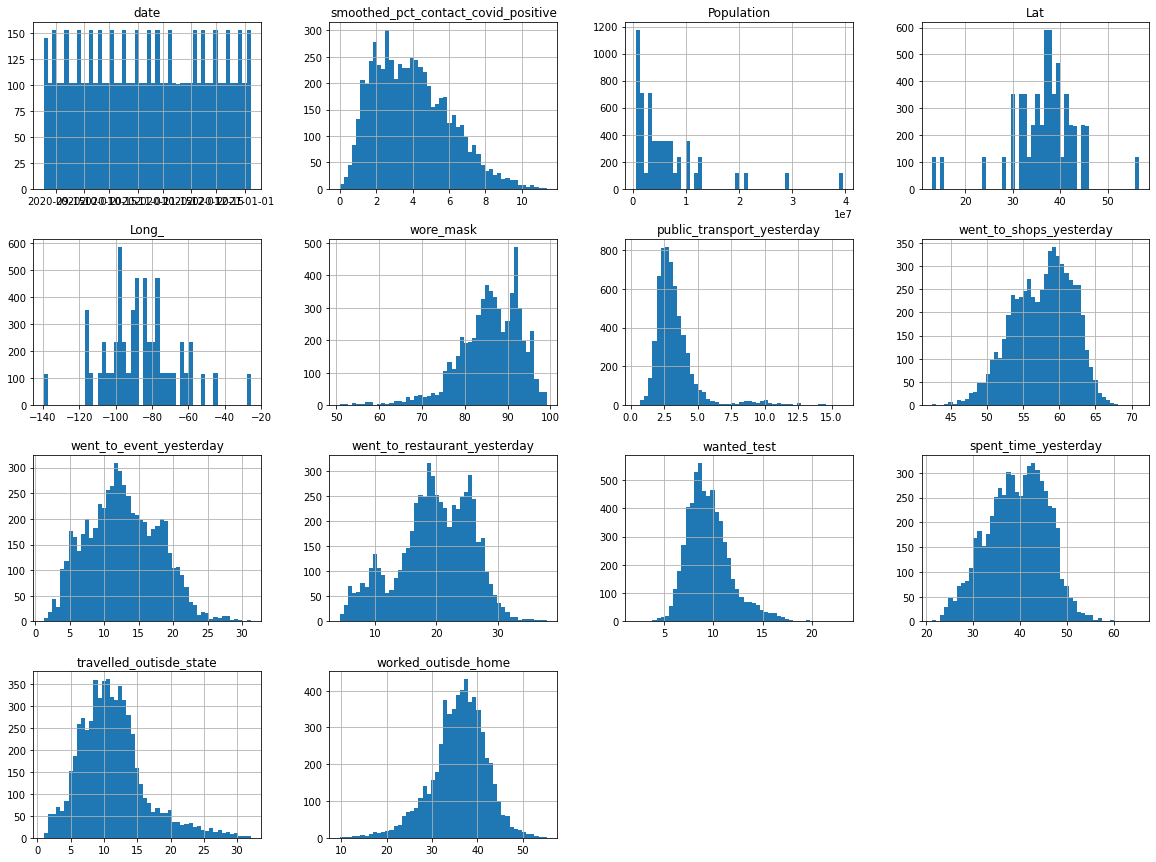

In [675]:
# lets plot some histograms now with newly formed df
df2.hist(bins = 50, figsize=(20,15))


 <font color = blue> The data looks much better than original df

In [539]:
#Let's check null v
df2.isnull().sum()


code                                   0
date                                   0
smoothed_pct_contact_covid_positive    0
Province_State                         0
cases                                  0
cases_7daylag                          0
deaths_21daylag                        0
deaths                                 0
Population                             0
Lat                                    0
Long_                                  0
wore_mask                              0
public_transport_yesterday             0
went_to_shops_yesterday                0
went_to_event_yesterday                0
went_to_restaurant_yesterday           0
wanted_test                            0
spent_time_yesterday                   0
travelled_outisde_state                0
worked_outisde_home                    0
dtype: int64

In [540]:
#Let's look at some basic statistics again 
df2.describe()

,smoothed_pct_contact_covid_positive,Population,Lat,Long_,wore_mask,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home
count,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000,6010.000
mean,3.972,6453434.235,36.488,-86.380,85.935,3.285,57.710,12.776,19.651,9.552,39.473,11.294,35.904
std,2.053,7290396.547,7.034,19.915,7.182,1.693,4.117,5.158,6.052,2.274,6.371,4.998,6.008
min,0.000,578759.000,12.968,-139.572,50.762,0.382,42.385,1.228,4.300,2.105,21.196,0.934,9.703
25%,2.334,1787065.000,32.575,-98.350,81.927,2.343,54.665,9.002,16.132,8.015,34.977,7.927,32.687
50%,3.743,4467673.000,37.117,-87.463,86.601,2.912,58.179,12.442,19.997,9.229,39.802,10.728,36.407
75%,5.371,7614893.000,40.452,-77.351,91.497,3.672,60.895,16.635,24.404,10.699,44.264,13.640,39.891
max,11.374,39512223.000,56.628,-25.672,99.172,15.847,71.026,31.256,37.995,23.182,65.440,32.048,55.260


<font color = blue> The numbers aren't in the extreme which is good

### <font color = purple> feature selection using wrapper method 

In [544]:
#lets use wrappers to select select the most useful features using 
# root mean square error as a measure

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn import model_selection

#let's make the the deaths the target variable 
X = df2.iloc[:,[2,11,12,13,14,15,16,17,18,19]]
Y = df2.loc[:,['deaths_21daylag' ]]
Y=Y.astype('int')


cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, Y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(Y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(Y,y_pred),2)))

#train dataset 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.4)

#Forward selection will be used 
sfs1 = SFS(classifier_pipeline, 
           k_features=1, 
           forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv)


#Fit the training sets and look at the average score 
sfs1.fit(X,Y)

sfs1.subsets_

RMSE: 23.35
R_squared: 0.57


{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([-547.52502496, -774.22996672, -506.61212978, -536.38246256,
         -413.24510815, -409.37372712, -358.4621797 , -890.40996672,
         -458.53803661, -556.93896839]),
  'avg_score': -545.1717570715474,
  'feature_names': ('smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_shops_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'wanted_test',
   'spent_time_yesterday',
   'travelled_outisde_state',
   'worked_outisde_home')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 8, 9),
  'cv_scores': array([-556.23104825, -764.97414309, -491.58111481, -549.66549085,
         -391.65562396, -397.67886855, -354.2846589 , -887.41537438,
         -464.78638935, -541.60675541]),
  'avg_score': -539.9879467554076,
  'feature_names': ('smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_shops_yesterday',


<font color = blue> you can see the average score slowly increases until 8 features is introduce before the jump is slightly a bigger difference, between 10 and 7 features the RMSE scores don't change too much so it suggests the most useful features whilst keeping the difference in RMSE quite small. This is a very useful process in eliminating some variables. 


### <font color = purple> RandomForest Regression before PCA 

In [734]:
#lets  apply a random forest algorithm before applying PCA for comparison

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
rmse_RandFor_before_pca = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse_RandFor_before_pca)
model.score(X_test, Y_test)

/var/folders/zl/h52nhq_16f15jmzlb8z5lnv00000gn/T/ipykernel_46298/1185626938.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)



RMSE:  25.788


0.4800429483893497

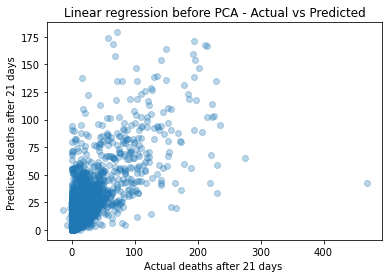

In [736]:
mpl.scatter(x = Y_test, y = Y_pred, alpha = 0.3)
mpl.title('Linear regression before PCA - Actual vs Predicted')
mpl.xlabel('Actual deaths after 21 days ')
mpl.ylabel('Predicted deaths after 21 days ')
mpl.show()

### <font color = purple>scaling 

In [714]:
from sklearn.preprocessing import StandardScaler as ss
df2.columns

Index(['code', 'date', 'smoothed_pct_contact_covid_positive', 'Province_State',
       'cases', 'cases_7daylag', 'deaths_21daylag', 'deaths', 'Population',
       'Lat', 'Long_', 'wore_mask', 'public_transport_yesterday',
       'went_to_shops_yesterday', 'went_to_event_yesterday',
       'went_to_restaurant_yesterday', 'wanted_test', 'spent_time_yesterday',
       'travelled_outisde_state', 'worked_outisde_home'],
      dtype='object')

In [715]:
#Lets use the features found useful in feature selection for scaling purposes 
ex =df2[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']].copy()
ex.head(10)

,smoothed_pct_contact_covid_positive,wore_mask,public_transport_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,spent_time_yesterday,travelled_outisde_state,deaths_21daylag
0,2.125,68.739,6.019,19.427,26.388,58.959,24.274,2.000
1,2.403,84.943,3.773,11.836,21.082,48.465,15.053,9.000
2,2.122,82.309,4.583,20.712,23.217,52.906,16.486,22.000
3,3.366,84.846,2.340,18.676,22.733,48.520,18.233,12.000
4,4.042,79.520,2.285,19.967,23.104,52.234,14.158,16.000
5,2.491,91.921,6.677,10.271,23.738,45.136,9.158,5.000
6,2.098,81.363,2.897,19.274,28.818,50.528,13.026,4.000
7,3.765,74.771,2.922,22.120,26.576,59.247,17.130,4.000
8,6.110,83.660,2.967,18.652,19.595,44.552,16.973,32.000
9,5.183,71.183,1.967,19.884,27.106,47.735,11.919,14.000


In [716]:
ex = ss().fit_transform(ex)

In [717]:
ex = pd.DataFrame(ex, index = df2.index,
columns =['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag'])
                  
                  
ex.head()

,smoothed_pct_contact_covid_positive,wore_mask,public_transport_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,spent_time_yesterday,travelled_outisde_state,deaths_21daylag
0,-0.900,-2.394,1.615,1.290,1.113,3.059,2.597,-0.561
1,-0.765,-0.138,0.288,-0.182,0.237,1.412,0.752,-0.365
2,-0.901,-0.505,0.767,1.539,0.589,2.109,1.039,-0.001
3,-0.295,-0.152,-0.559,1.144,0.509,1.420,1.389,-0.281
4,0.034,-0.893,-0.591,1.394,0.571,2.003,0.573,-0.169


In [718]:
#Set X and Y for training purposes
X = ex.loc[:, ex.columns != 'deaths_21daylag']
Y = ex.loc[:,['deaths_21daylag' ]]
X

,smoothed_pct_contact_covid_positive,wore_mask,public_transport_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,spent_time_yesterday,travelled_outisde_state
0,-0.900,-2.394,1.615,1.290,1.113,3.059,2.597
1,-0.765,-0.138,0.288,-0.182,0.237,1.412,0.752
2,-0.901,-0.505,0.767,1.539,0.589,2.109,1.039
3,-0.295,-0.152,-0.559,1.144,0.509,1.420,1.389
4,0.034,-0.893,-0.591,1.394,0.571,2.003,0.573
...,...,...,...,...,...,...,...
6005,0.917,0.236,-1.115,-0.563,-0.441,-0.795,-0.047
6006,0.312,1.068,-0.802,-1.233,-0.953,-1.473,-0.117
6007,0.930,0.475,-0.853,-0.482,-0.111,-0.605,0.174
6008,0.164,0.982,0.057,-1.176,-1.700,-1.320,-0.092


In [682]:
#Let's look at correlation with variable
corr = X.corr()
corr



,smoothed_pct_contact_covid_positive,wore_mask,public_transport_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,spent_time_yesterday,travelled_outisde_state
smoothed_pct_contact_covid_positive,1.000,-0.252,-0.406,0.039,-0.102,-0.214,-0.180
wore_mask,-0.252,1.000,0.235,-0.854,-0.746,-0.720,-0.133
public_transport_yesterday,-0.406,0.235,1.000,-0.128,0.002,-0.012,-0.002
went_to_event_yesterday,0.039,-0.854,-0.128,1.000,0.897,0.880,0.202
went_to_restaurant_yesterday,-0.102,-0.746,0.002,0.897,1.000,0.865,0.227
spent_time_yesterday,-0.214,-0.720,-0.012,0.880,0.865,1.000,0.306
travelled_outisde_state,-0.180,-0.133,-0.002,0.202,0.227,0.306,1.000


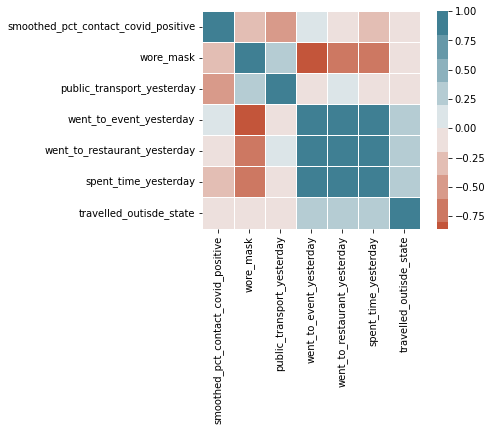

In [683]:
import seaborn as sns

cor_mat = sns.heatmap(
    corr,
  center = 0,
    cmap = sns.diverging_palette(20,220, n = 10),
    square = True,
    linewidths = 0.5
)

 <font color = blue> you can see that there is a strong correlation with doing activities that are similar in behaviour more specifically activities that are heavily associated with socialising like attending a large event and going to a restaurant. Usually the strongly correlated behaviour indicators occur simulatanously naturally as in you would attend a soccer match with friends and family and then visit a restaurant after. 

 summary of task A 
    <br>
    
  The initial research question of exploring co-morbidities in Covid-19 was dropped due to the fact that the deaths/cases were only categorised by state so there would be no way of knowing the cases and deaths by those indicators. Also simply having those comorbidities wouldn't be useful in explaining their effect on the target variables. Therefore behaviour indicators were looked at instead. Also initially global data was used but it was realised that there were way too many empty cells, in fact less than 5% of the data was filled. 
  
  <br>
  Other issues when dealing with the data sets included extremely high numbers that couldn't be explained and it was realised very late that the weighted data had '0' (no empty cells) as the value for empty cells. Had this been realised earlier, other indicators would've been looked at. Also the fact that the cases and deaths data were cumalative was realised  late too but was adjusted for and then helped with machine learning algorithms to get better scores. 
  <br>
  
 It was very ideal that there were multiple indicators that helped in the research question that were available from the data source which were imported, this was much better than completely changing the research question however the problem with the imported data source was that they were only available after Septemeber 2020 to January 2021. Therefore a very short time span which isn't representative of all initial covid times and generally a very small time period to make any generalisations. 
 <br>
 
 The feature selection tool was extremely useful and insightful. This could have been further be analysed if there were time, like in some instance due to low/highe variance some features can be combined or removed. Regradless, the features found were used further down which helped in reducing computing power, reduced the chances of overfitting, was less complex and reduced disk space. 
 <br>
 
 It would have been better to aggregate data by FIPS instead of states but initally this took too long, but this was in very early stages. 
 <br>
 
 It was very useful that the data was available in a smooth percentage weighted format and is helpful in reducing steps and removing noisy data. Otherwise all the 4 major preprocessing steps of data integration, cleaning, transformation and reduction were completed. 

## <font color = Brown > task B - unsupervised learning

### <font color = purple> PCA for feature reduction 

In [684]:
#Let's apply PCA such that 95% variance is achieved 
from sklearn.decomposition import PCA
pca = PCA(n_components = .95)
ex_pca = pca.fit_transform(X)
ex_pca

#Let's see how many components PCA reduces the dataset to 
pca.n_components_


5

<font color = blue>  5 components can be useful and faster to run more than running the current 10 features whislt keeping a very high variance.

In [700]:
#convert PCA array to a pandas data frame
ex_pca = pd.DataFrame(ex_pca, columns = ['PC1','PC2','PC3','PC4', 'PC5'])
ex_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,4.166,2.248,1.040,1.301,1.196
1,0.896,1.127,0.483,-0.217,0.071
2,2.483,1.560,0.257,0.075,0.009
3,1.882,0.427,1.223,-0.288,-0.352
4,2.537,-0.127,0.390,-0.341,-0.025


In [686]:
#Look at the variance per component
pca.explained_variance_ratio_

array([0.5102049 , 0.22439555, 0.13136234, 0.08206345, 0.0254321 ])

In [687]:
#Let's try to get a visual representation of the PCA
from sklearn import preprocessing
scaled_data=preprocessing.scale(X.T)

pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [688]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=['PC' + str(x) for x in range (1, len(per_var)+1)]

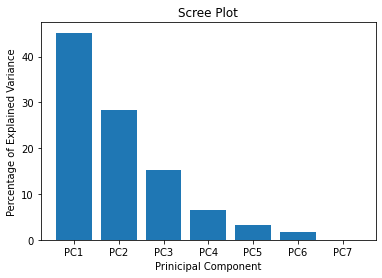

In [689]:
import matplotlib.pyplot as plt
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Prinicipal Component')
plt.title('Scree Plot')
plt.show()


In [691]:
# Now we can visualise the features as part of the two main components and 
# how they align in PCA perspective.

df2_dummy=df2[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']]

In [692]:
scaler = MinMaxScaler()

#We will scale the data again for visualisation purposes but won't use this further down
scaler.fit(df2[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']])
df2_dummy[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']] = scaler.transform(df2[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']])


/var/folders/zl/h52nhq_16f15jmzlb8z5lnv00000gn/T/ipykernel_46298/780297943.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_dummy[['smoothed_pct_contact_covid_positive',


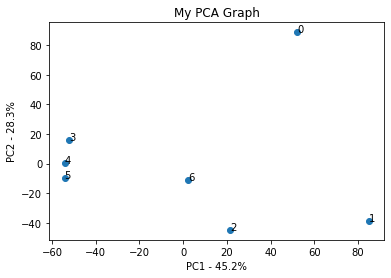

In [703]:
pca_df=pd.DataFrame(pca_data,  columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    
for sample in pca_df.index:
           plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

<font color = blue>  Similar to our correlation plot, we can see that the same three feature are very close to each other. Just for reference 
    
<font color = blue>  0=  'smoothed_pct_contact_covid_positive',
    
<font color = blue>  1= 'wore_mask',
    
<font color = blue>2='public_transport_yesterday',
    
<font color = blue> 3= 'went_to_event_yesterday',
    
<font color = blue>4= 'went_to_restaurant_yesterday',
    
<font color = blue>5= 'spent_time_yesterday',
    
<font color = blue>6= 'travelled_outisde_state', 
    

<font color = blue>6 , 2, 0 seem to be far apart and distinctive indicating they are possibly useful and distinctive features that could help in this machine learning task 
    
  

In [694]:
#Helps us to know which rows had the largest influence on seperating the two clusters along the axis 

loading_scores=pd.Series(pca.components_[0], )
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
top5ind=sorted_loading_scores[0:10].index.values
print(loading_scores[top5ind])

833    -0.019
424    -0.019
354    -0.019
507    -0.019
1206   -0.019
808    -0.019
942    -0.019
571    -0.019
884    -0.019
620    -0.019
dtype: float64


<font color = blue> with more time we could've further explored these variables to understand their significance

### <font color = purple> K means clustering 

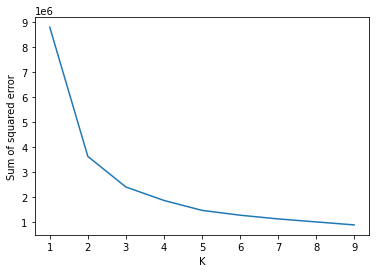

In [796]:
#Lets make an elbow plot to decide how many clusters to use in K means clustering 

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']])
    sse.append(km.inertia_)
    plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

<font color = blue> clearly three is where the elbow occurs and it should be the ideal number 

In [802]:
df2_dummy_k=df2[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']]

In [803]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df2_dummy[['smoothed_pct_contact_covid_positive',
   'wore_mask',
   'public_transport_yesterday',
   'went_to_event_yesterday',
   'went_to_restaurant_yesterday',
   'spent_time_yesterday',
   'travelled_outisde_state', 'deaths_21daylag']])
y_predicted

array([1, 1, 1, ..., 2, 0, 1], dtype=int32)

In [804]:
#we will make a dummy cluster

df2_dummy_k['cluster']=y_predicted
df2_dummy_k

/var/folders/zl/h52nhq_16f15jmzlb8z5lnv00000gn/T/ipykernel_46298/1460718159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_dummy_k['cluster']=y_predicted


,smoothed_pct_contact_covid_positive,wore_mask,public_transport_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,spent_time_yesterday,travelled_outisde_state,deaths_21daylag,cluster
0,2.125,68.739,6.019,19.427,26.388,58.959,24.274,2.000,1
1,2.403,84.943,3.773,11.836,21.082,48.465,15.053,9.000,1
2,2.122,82.309,4.583,20.712,23.217,52.906,16.486,22.000,1
3,3.366,84.846,2.340,18.676,22.733,48.520,18.233,12.000,1
4,4.042,79.520,2.285,19.967,23.104,52.234,14.158,16.000,1
...,...,...,...,...,...,...,...,...,...
6005,5.855,87.630,1.399,9.873,16.983,34.408,11.062,37.000,2
6006,4.614,93.608,1.927,6.419,13.884,30.089,10.709,3.000,0
6007,5.882,89.349,1.842,10.289,18.980,35.619,12.165,107.000,2
6008,4.308,92.984,3.382,6.709,9.365,31.065,10.834,116.000,0


In [805]:
km.cluster_centers_

array([[0.27417213, 0.8701265 , 0.23304543, 0.19710563, 0.25981978,
        0.27021415, 0.29247455, 0.16801466],
       [0.27487974, 0.63882716, 0.18699038, 0.52245099, 0.60231583,
        0.53589219, 0.38492547, 0.15297067],
       [0.57565466, 0.71683066, 0.13513082, 0.35436212, 0.41892146,
        0.35737884, 0.285665  , 0.18068633]])

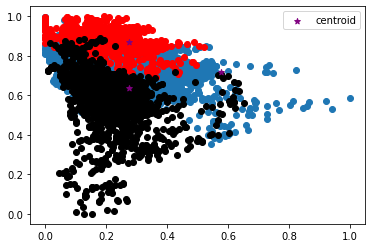

In [806]:
#Let's visualise the clusters and their centroids
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df145.loc[df145['cluster'] == 0]
filtered_label1 = df145.loc[df145['cluster'] == 1]
 
filtered_label2 = df145.loc[df145['cluster'] == 2]
km.cluster_centers_
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'red')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<AxesSubplot:xlabel='cluster', ylabel='deaths_21daylag'>

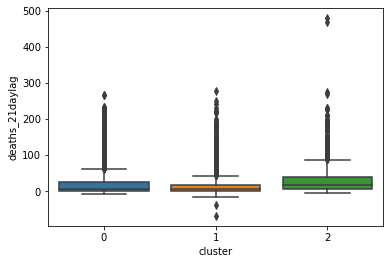

In [811]:
#let's try to find some trends of the clusters formed
sns.boxplot(x=df2_dummy_k['cluster'], y=df2_dummy_k["deaths_21daylag"])

<font color = blue> We can see the median (and upper quartile) for cluster 2 for deaths is higher but more spread out with a great outliers, whereas 0 and 1 have similar medians but smaller interquartile ranges. 

<AxesSubplot:xlabel='cluster', ylabel='went_to_event_yesterday'>

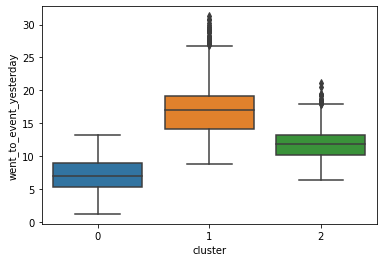

In [812]:
sns.boxplot(x=df2_dummy_k['cluster'], y=df2_dummy_k["went_to_event_yesterday"])

<font color = blue> This feature was specifically looked into as it correlates with other features and is assumed (from real life experiences) to contribute to higher death rates, it essentially measure whether socialising effects deaths. We can see data in cluster 1 have higher scores all round with 2 and then 1 following.  As data is by state then the differences could be due to state guidelines, wealth, population, deprivation...etc.

<AxesSubplot:xlabel='cluster', ylabel='wore_mask'>

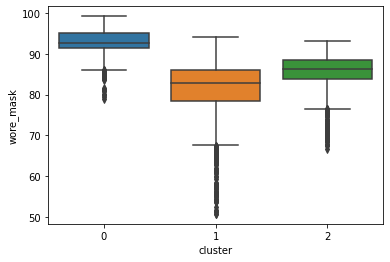

In [813]:
sns.boxplot(x=df2_dummy_k['cluster'], y=df2_dummy_k["wore_mask"])

<font color= blue> This would be a feature that is thought to be useful in decreasing death rate (again based on real life experiences/science), so an interesting feature to understand the clusters. Group 0 follows more guidelines, so maybe it is down to state regulations as they also show low numbers od death.  Similarly group 1 seems to wear less masks, go out more and have more deaths

Summary of task B:

PCA was very useful in reducing features and removing correlation amongst features, it helps in imporving algorithm performance, reducing overfitting and visualising data.

<br>
Wheareas the cluster analysis was very useful in exploring possible new trends and was quite simple to implement. Had there been more time, more trends could've been discovered and new data could be found to support trends as mentioned above (like regulations). 

<br>

This part was very important and set up the stage for the data to be used in the supervised learning task. Once established, it was simple to carry on using reduced dimension data. 

## <font color = brown> Task C: Supervised Learning 

### <font color = Purple > Random Forest 

In [724]:
from sklearn.ensemble import RandomForestRegressor
Y=df2['deaths_21daylag']
Y=Y.astype('int')

X_train, X_test, Y_train, Y_test = model_selection.train_test_split (ex_pca, Y, test_size=0.4, random_state=0)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
rmse_randFor = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse_randFor)
model.score(X_test, Y_test)


RMSE:  26.757


0.44023811825829073

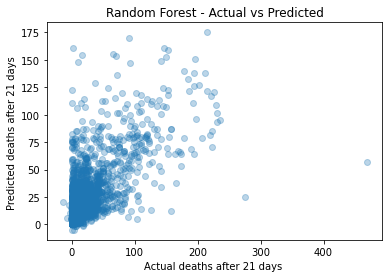

In [725]:
mpl.scatter(x = Y_test, y = Y_pred, alpha = 0.3)
mpl.title('Random Forest - Actual vs Predicted')
mpl.xlabel('Actual deaths after 21 days ')
mpl.ylabel('Predicted deaths after 21 days ')
mpl.show()

### <font color = Purple > Linear Regression


In [733]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.4, random_state=0)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
Y_pred = model.predict(X_test)


rmse_lin_reg = float(format(np.sqrt(mean_squared_error(y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse_lin_reg)



RMSE:  33.385


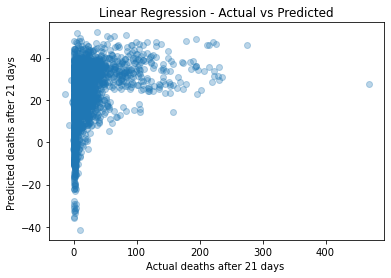

In [710]:
mpl.scatter(x = Y_test, y = Y_pred, alpha = 0.3)
mpl.title('Linear Regression - Actual vs Predicted')
mpl.xlabel('Actual deaths after 21 days ')
mpl.ylabel('Predicted deaths after 21 days ')
mpl.show()

### <font color = Purple > Support Vector Machine 

In [727]:

from sklearn import model_selection
from sklearn import svm


X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.4, random_state=0)
clf_ob = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
print(clf_ob.score(X_test, Y_test))
Y_pred = clf_ob.predict(X_test)


rmse_svm = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse_svm)


0.13685524126455906

RMSE:  42.048


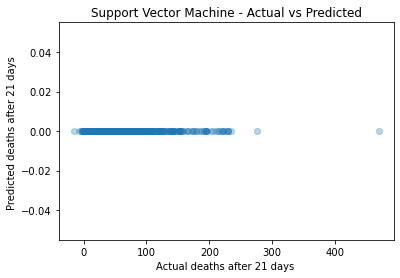

In [728]:
mpl.scatter(x = Y_test, y = Y_pred, alpha = 0.3)
mpl.title('Support Vector Machine - Actual vs Predicted')
mpl.xlabel('Actual deaths after 21 days ')
mpl.ylabel('Predicted deaths after 21 days ')
mpl.show()

<font color = blue>  This is an unusual graph, with more time and experience, it would've been explained, however for now the focus will be the RMSE 

### <font color = purple>Decision tree 

In [729]:
# decision tree for multioutput regression
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value
        
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y =df2.iloc[:,[2,11,12,13,14,15,16,17,18,19]].values, df2.loc[:,['deaths_21daylag' ]].values
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions


In [730]:
X1, Y1 =df2.iloc[:,[2,11,12,13,14,15,16,17,18,19]].values, df2.loc[:,['deaths_21daylag' ]].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=.4, random_state=0)
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()
Y_pred = regressor.predict(X_test) 
rmse_Dec_tree = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse_Dec_tree)

X_8 <= 10.9711655 ? 82.88260217797074
 left:X_0 <= 3.09585 ? 129.40470711813782
  left:X_0 <= 1.826381818181818 ? 51.93030810811592
    left:X_7 <= 48.926906 ? 5.546306686497452
        left:22.030948419301165
        right:22.030948419301165
    right:X_8 <= 6.6319809 ? 88.0074516140653
        left:22.030948419301165
        right:22.030948419301165
  right:X_1 <= 90.8580488 ? 196.9887577765985
    left:X_1 <= 83.8380821 ? 115.71985027309324
        left:22.030948419301165
        right:22.030948419301165
    right:X_7 <= 32.4245684 ? 507.145337819647
        left:22.030948419301165
        right:22.030948419301165
 right:X_8 <= 15.0478298 ? 32.159996403396065
  left:X_0 <= 2.633008333333333 ? 24.372814524547437
    left:X_5 <= 22.0553981 ? 14.644555034092662
        left:22.030948419301165
        right:22.030948419301165
    right:X_9 <= 32.0488812 ? 36.56016873329281
        left:22.030948419301165
        right:22.030948419301165
  right:X_8 <= 19.2598287 ? 6.4102639500073195
   

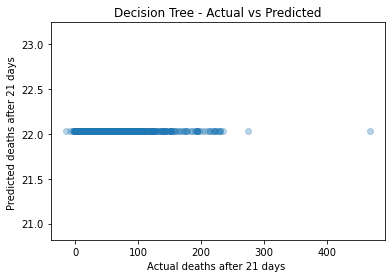

In [731]:
mpl.scatter(x = Y_test, y = Y_pred, alpha = 0.3)
mpl.title('Decision Tree - Actual vs Predicted')
mpl.xlabel('Actual deaths after 21 days ')
mpl.ylabel('Predicted deaths after 21 days ')
mpl.show()

### <font color = purple> Classification Supervised learning 

In [755]:
#Let's begin with binning the target variable 

#First lets makes a fair variable which accounts for deaths by population
df2['pct_pop'] = (df2['deaths_21daylag'] / df2['Population']) *100000
df2['pct_pop']=df2['pct_pop'].astype(str).astype(float)
df2

,code,date,smoothed_pct_contact_covid_positive,Province_State,cases,cases_7daylag,deaths_21daylag,deaths,Population,Lat,...,wore_mask,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home,pct_pop
0,WV,2020-09-08,2.125,West Virginia,87.000,264.000,2.000,4.000,1792147,37.452,...,68.739,6.019,68.016,19.427,26.388,4.914,58.959,24.274,47.898,0.112
1,MN,2020-09-08,2.403,Minnesota,383.000,491.000,9.000,2.000,5639632,44.528,...,84.943,3.773,60.429,11.836,21.082,9.155,48.465,15.053,41.347,0.160
2,PA,2020-09-08,2.122,Pennsylvania,449.000,735.000,22.000,8.000,12801989,39.635,...,82.309,4.583,66.093,20.712,23.217,6.753,52.906,16.486,40.580,0.172
3,KY,2020-09-08,3.366,Kentucky,255.000,789.000,12.000,1.000,4467673,37.005,...,84.846,2.340,63.068,18.676,22.733,7.071,48.520,18.233,41.126,0.269
4,AR,2020-09-08,4.042,Arkansas,294.000,273.000,16.000,9.000,3017804,34.005,...,79.520,2.285,61.103,19.967,23.104,7.616,52.234,14.158,39.612,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,KS,2021-01-04,5.855,Kansas,3950.000,6046.000,37.000,18.000,2913314,37.766,...,87.630,1.399,50.029,9.873,16.983,9.537,34.408,11.062,27.895,1.270
6006,VA,2021-01-04,4.614,Virginia,3771.000,2599.000,3.000,8.000,8535519,37.010,...,93.608,1.927,50.475,6.419,13.884,10.269,30.089,10.709,24.336,0.035
6007,IN,2021-01-04,5.882,Indiana,3617.000,2465.000,107.000,110.000,6732219,38.990,...,89.349,1.842,51.026,10.289,18.980,7.943,35.619,12.165,28.980,1.589
6008,IL,2021-01-04,4.308,Illinois,5059.000,4453.000,116.000,90.000,12671821,39.077,...,92.984,3.382,49.311,6.709,9.365,9.384,31.065,10.834,24.693,0.915


In [756]:
#Lets bin the target variable into 5 quantiles, so the smallest number one will represrent 
# the most deaths/population whereas the biggest number will represent quantile will represent the


df2['Quantile_rank'] = pd.qcut(df2['pct_pop'], 5, labels = False)
df2

,code,date,smoothed_pct_contact_covid_positive,Province_State,cases,cases_7daylag,deaths_21daylag,deaths,Population,Lat,...,public_transport_yesterday,went_to_shops_yesterday,went_to_event_yesterday,went_to_restaurant_yesterday,wanted_test,spent_time_yesterday,travelled_outisde_state,worked_outisde_home,pct_pop,Quantile_rank
0,WV,2020-09-08,2.125,West Virginia,87.000,264.000,2.000,4.000,1792147,37.452,...,6.019,68.016,19.427,26.388,4.914,58.959,24.274,47.898,0.112,1
1,MN,2020-09-08,2.403,Minnesota,383.000,491.000,9.000,2.000,5639632,44.528,...,3.773,60.429,11.836,21.082,9.155,48.465,15.053,41.347,0.160,2
2,PA,2020-09-08,2.122,Pennsylvania,449.000,735.000,22.000,8.000,12801989,39.635,...,4.583,66.093,20.712,23.217,6.753,52.906,16.486,40.580,0.172,2
3,KY,2020-09-08,3.366,Kentucky,255.000,789.000,12.000,1.000,4467673,37.005,...,2.340,63.068,18.676,22.733,7.071,48.520,18.233,41.126,0.269,2
4,AR,2020-09-08,4.042,Arkansas,294.000,273.000,16.000,9.000,3017804,34.005,...,2.285,61.103,19.967,23.104,7.616,52.234,14.158,39.612,0.530,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,KS,2021-01-04,5.855,Kansas,3950.000,6046.000,37.000,18.000,2913314,37.766,...,1.399,50.029,9.873,16.983,9.537,34.408,11.062,27.895,1.270,4
6006,VA,2021-01-04,4.614,Virginia,3771.000,2599.000,3.000,8.000,8535519,37.010,...,1.927,50.475,6.419,13.884,10.269,30.089,10.709,24.336,0.035,0
6007,IN,2021-01-04,5.882,Indiana,3617.000,2465.000,107.000,110.000,6732219,38.990,...,1.842,51.026,10.289,18.980,7.943,35.619,12.165,28.980,1.589,4
6008,IL,2021-01-04,4.308,Illinois,5059.000,4453.000,116.000,90.000,12671821,39.077,...,3.382,49.311,6.709,9.365,9.384,31.065,10.834,24.693,0.915,4


(0.0, 5.0)

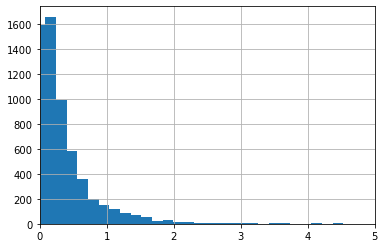

In [757]:
#Let's take a look at percentage of deaths/population

ax=df2['pct_pop'].hist(bins=100)

ax.set_xlim((0,5))

  <font color = blue>  
We can see data is skewed to the left with greater numbers of deaths/population occuring under the 0.5% value 

### <font color = purple>  Logistic regression 

In [758]:
#Define X and Y
X = ex.loc[:, ex.columns != 'deaths_21daylag']
Y = df2.Quantile_rank

#Split data into test and train 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)

In [759]:
from sklearn.linear_model import LogisticRegression

In [760]:
logit = LogisticRegression().fit(x_train, y_train)

In [761]:
logit_pred = logit.predict(x_test)

In [762]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [763]:
confusion_matrix(y_test, logit_pred)

array([[166, 134,  42,  41,  91],
       [130, 191,  73,  45,  57],
       [ 93, 128,  91,  85,  81],
       [ 70,  64,  86, 115, 150],
       [ 27,  16,  32,  58, 338]])

In [764]:
Logistic_regression_score=accuracy_score(y_test, logit_pred)
Logistic_regression_score

0.3747920133111481

### <font color = purple>  Decision tree 

In [765]:
from sklearn.tree import DecisionTreeClassifier

In [766]:
tree_restricted = DecisionTreeClassifier(criterion = 'entropy', random_state = 123, max_depth = 4)

In [767]:
tree_restricted.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [768]:
tree_restricted.score(x_train, y_train)

0.3954520244037715

In [769]:
decision_tree_score=tree_restricted.score(x_test, y_test)
decision_tree_score

0.3781198003327787

In [770]:
print(tree_restricted.feature_importances_)

[0.74368715 0.03590515 0.03463523 0.05082257 0.08499393 0.01071913
 0.03923685]


### <font color = purple>   RandomForestClassifier

In [627]:
from sklearn.ensemble import RandomForestClassifier

In [628]:
rf = RandomForestClassifier(random_state = 123, verbose=1)

In [629]:
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomForestClassifier(random_state=123, verbose=1)

In [630]:
rf.feature_importances_

array([0.18771544, 0.13694502, 0.14276566, 0.13185853, 0.13444012,
       0.13367612, 0.13259911])

In [632]:
random_forest_score=rf.score(x_train, y_train)
random_forest_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


1.0

In [634]:
random_forest_score=rf.score(x_test, y_test)
random_forest_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.43760399334442596

### <font color = purple>   Bagging

In [310]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, Y, cv=5)
scores.mean()

0.1840392728281987

In [658]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [659]:
tree_restricted = DecisionTreeClassifier(criterion = 'entropy', random_state = 123, max_depth=4)

In [660]:
bagging = BaggingClassifier(tree_restricted, n_estimators = 100, max_samples=0.8, random_state=123)

In [661]:
bagging.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=123),
                  max_samples=0.8, n_estimators=100, random_state=123)

In [662]:
bagging.base_estimator_
bagging.n_features_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


7

In [663]:
bagging.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=979381764),
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                        random_state=1540578008),
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                        random_state=2115349175),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=745079110),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=268929039),
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                        random_state=1421066145),
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                        random_state=1770928879),
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                        random_state=1108254685),
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                        random_state=1151137695),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=976517999),
 DecisionTreeClassif

In [664]:
bagging.score(x_train, y_train)

0.4295618413754853

bagging_score=bagging.score(x_test, y_test)
bagging_score

In [ ]:
import numpy as np
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis = 0)
feature_importances

## <font color = purple>Summary of task C:

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'rmse_RandFor_before_pca'),
  Text(1, 0, 'rmse_randFor'),
  Text(2, 0, 'rmse_lin_reg'),
  Text(3, 0, 'rmse_svm'),
  Text(4, 0, 'rmse_Dec_tree')])

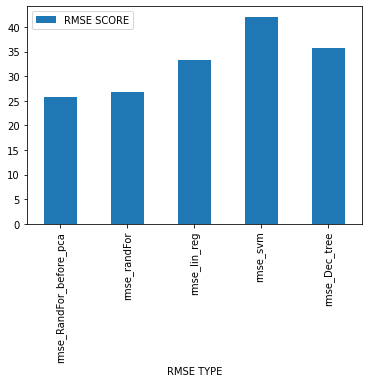

In [745]:
#Let's compare the RMSE values for all of the supervised learning algorithms 
df = pd.DataFrame({'RMSE TYPE':['rmse_RandFor_before_pca','rmse_randFor', 'rmse_lin_reg', 'rmse_svm', 'rmse_Dec_tree'], 'RMSE SCORE': [25.788, 26.757, 33.385, 42.048, 35.763]})
ax = df.plot.bar(x='RMSE TYPE', y='RMSE SCORE', rot=0)
plt.xticks(rotation=90)

  <font color = blue> In the case of classification supervised learning, the random forest shows the highest accuracy therefore it should be chosen for the suoervised learning model when it becomes a classification problem. The other three types have similar scores. Similarly to regression type sumamary, the algorithms could've been further explored to understand why they behaved the way they did.  Clearly random forest is the best option for the purpose of supervised learning as it has the lowest RMSE score. We can also observe that applying PCA makes a very small difference but is very useful for reducing computing power and gaining faster results. This shows how useful PCA is. If there were time the reasons for such high RMSE scores could've been explored and efforts could have been made to make them smaller. Also why algorithms performed the way they did could have been investigated. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic_regression_score'),
  Text(1, 0, 'decision_tree_score'),
  Text(2, 0, 'random_forest_score'),
  Text(3, 0, 'bagging_score')])

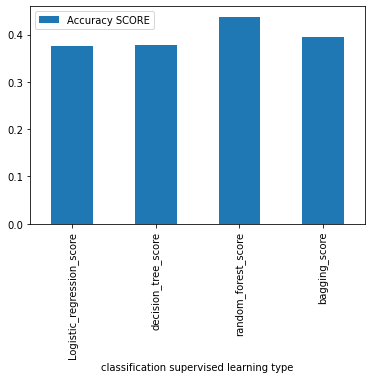

In [775]:
#Let's compare the RMSE values for all of the supervised learning algorithms 
df = pd.DataFrame({'classification supervised learning type':['Logistic_regression_score','decision_tree_score', 'random_forest_score', 'bagging_score'], 'Accuracy SCORE': [0.3747920133111481, 0.3781198003327787, 0.43760399334442596, 0.3951747088186356]})
ax = df.plot.bar(x='classification supervised learning type', y='Accuracy SCORE', rot=0)
plt.xticks(rotation=90)


 <font color = blue> In the case of classification supervised learning, the random forest shows the highest accuracy therefore it should be chosen for the suoervised learning model when it becomes a classification problem. The other three types have similar scores. Similarly to regression type sumamary, the algorithms could've been further explored to understand why they behaved the way they did. 

### <font color = Brown>  Conclusion and final thoughts

It was useful that the data was available smoothed and weighted and as a percentage, this was useful in reducing steps. The problems with the dataset were realsied very late into the assignment, with more experience this would have been found earlier. It was very handy to have more data available from the same data source but instead of importing the data it might have been better to focus on symptoms data instead. 
The feature selection method using wrappers was very insightful but could have been further developed. 

The PCA was useful in reducing dimension and the reduced feature dataset was used all the way after. K means clustering was very interesting to understand how the data was grouped, some basic analysis was done and showed atleast one very distintive assumption that the same group that wore less mask and socialised more had more deaths/population for that region and the opposite could be said for another cluster group. Further analysis would need to be conducted to understand the final cluster group. With more time other variables such as government guidelines for each state could have been explored. 

The supervised learning task showed that random forest performed better in both classification and regression type algorithms based on accuracy and RMSE score. Further investigation could have been done to get a deeper understanding of each algorithm and why they performed the way they did.  

The limitations of this task include several things such as time and experience, both of which if were increased would contribute to more effecient code, better understanding of various meachine learning algorthims and extensive analysis on the outcomes of each algorithm. Other limitations include low processing power and extreme missing values as well as unexplainable extreme numbers within the dataset. Due to this, it would have been wiser to focus the research question on more readily available features such as the symptoms as it could be analysed over longer periods of time. The fact that the data focused on such a narrow window of time isn't conclusive or representative of the entire period of Covid and may be biased due to stricter guidelines and people knowing what guidelines to follow from a scientific prospective. Global data would've been more of a represntative sample. 

Further analysis would include investing the covid cases as a target variable too just as deaths were. Also the supervised learning algorithms could've used data with more features to see the effect of additional features in the case of K means clustering (before feature reduction) to understand the clusters better. More investigation could be done to understand the outcomes of each algorithm and the trends in the clusters.
It would have been interesting to see the effects of gender and sex and other features such as index of deprivation, education and wealth by having the cases and deaths available by those categories. Also data could be aggregated by FIPS instead of state. 